# Projet 08 : Communiquer des résultats
# Partie 3 : Modélisation - Préparation des données pour la modélisation

---
**Importation des librairies**

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import model_selection

import modules_perso.sf_graphiques as sfg
import modules_perso.sf_classification_acp as sfca
import modules_perso.sf_modeles_anova as sfma

<a id='1_0'></a>

---
## <font color=blue>Mission 3 : Modélisation</font>

## 3.1. Préparation des données pour la modélisation

**Chargement des données de base**

In [4]:
echant_alea_data21 = pd.read_csv("echant_random_data21.csv", parse_dates=["dateref"], index_col=["contract_id","dateref"])
echant_alea_data21.head()

category_name  somme_signaux  variation_21_standard  \
contract_id dateref                                                          
9           2015-07-22          LTIR            165           4.013552e-01   
91          2009-06-29        Metals             30           5.976307e-02   
32          2009-08-14          STIR            416           5.403889e-01   
6           2010-02-26    Currencies             67          -4.207197e-01   
37          2011-08-18          STIR            432          -3.030987e-13   

                        cluster  top_cluster  
contract_id dateref                           
9           2015-07-22        8        False  
91          2009-06-29        2        False  
32          2009-08-14        0         True  
6           2010-02-26        6        False  
37          2011-08-18        1        False

In [5]:
echant_alea_data42 = pd.read_csv("echant_random_data42.csv", parse_dates=["dateref"], index_col=["contract_id","dateref"])
echant_alea_data42.head()

category_name  somme_signaux  variation_42_standard  \
contract_id dateref                                                          
13          2013-12-26          LTIR            136               0.492840   
12          1991-05-03          LTIR              0              -0.069842   
15          1991-01-04          LTIR              0              -0.144532   
23          2001-06-22        Energy           -200              -0.368365   
26          2006-06-15        Energy            343               0.362887   

                        cluster  top_cluster  
contract_id dateref                           
13          2013-12-26        6        False  
12          1991-05-03        0        False  
15          1991-01-04        0        False  
23          2001-06-22        9        False  
26          2006-06-15        8        False

In [6]:
echant_alea_data64 = pd.read_csv("echant_random_data64.csv", parse_dates=["dateref"], index_col=["contract_id","dateref"])
echant_alea_data64.head()

category_name  somme_signaux  variation_64_standard  \
contract_id dateref                                                          
44          2002-05-16         Index            -59              -0.655845   
25          2009-03-31        Energy           -380               0.694890   
59          1990-06-11         Index              0              -0.621847   
25          1993-05-11        Energy             18              -0.861281   
33          1997-09-15          STIR            424               0.346597   

                        cluster  top_cluster  
contract_id dateref                           
44          2002-05-16        8        False  
25          2009-03-31        9        False  
59          1990-06-11        8        False  
25          1993-05-11        8        False  
33          1997-09-15        0        False

In [7]:
echant_annees_data21 = pd.read_csv("echant_annees_data21.csv", parse_dates=["dateref"], index_col=["contract_id","dateref"])
echant_annees_data21.head()

category_name  somme_signaux  variation_21_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.439909   
            2013-11-18    Currencies            169              -0.505274   
            2013-11-19    Currencies            171              -0.634760   
            2013-11-20    Currencies            173              -0.537266   
            2013-11-21    Currencies            175              -0.362235   

                        cluster  top_cluster  
contract_id dateref                           
1           2013-11-15        6        False  
            2013-11-18        6        False  
            2013-11-19        5        False  
            2013-11-20        6        False  
            2013-11-21        6        False

In [8]:
echant_annees_data42 = pd.read_csv("echant_annees_data42.csv", parse_dates=["dateref"], index_col=["contract_id","dateref"])
echant_annees_data42.head()

category_name  somme_signaux  variation_42_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.595471   
            2013-11-18    Currencies            169              -0.656479   
            2013-11-19    Currencies            171              -0.703792   
            2013-11-20    Currencies            173              -0.601488   
            2013-11-21    Currencies            175              -0.439233   

                        cluster  top_cluster  
contract_id dateref                           
1           2013-11-15        5        False  
            2013-11-18        5        False  
            2013-11-19        5        False  
            2013-11-20        5        False  
            2013-11-21        5        False

In [9]:
echant_annees_data64 = pd.read_csv("echant_annees_data64.csv", parse_dates=["dateref"], index_col=["contract_id","dateref"])
echant_annees_data64.head()

category_name  somme_signaux  variation_64_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.316204   
            2013-11-18    Currencies            169              -0.324719   
            2013-11-19    Currencies            171              -0.415088   
            2013-11-20    Currencies            173              -0.308570   
            2013-11-21    Currencies            175              -0.234643   

                        cluster  top_cluster  
contract_id dateref                           
1           2013-11-15        4        False  
            2013-11-18        2        False  
            2013-11-19        2        False  
            2013-11-20        2        False  
            2013-11-21        4        False

**Ajout des sommes par indicateur, par horizon temporel et par combinaison indicateur/horizon temporel**

In [10]:
agreg_contrat_indicateur = pd.read_csv("agreg_contrat_indicateur.csv", index_col=0, parse_dates=["dateref"])
agreg_contrat_indicateur.head()

C:\Anaconda3\envs\Jupyter\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


trading_indicator category_name  contract_id    dateref  somme_signaux
0               BRO    Currencies            1 1989-11-01              0
1               BRO    Currencies            1 1989-11-02              0
2               BRO    Currencies            1 1989-11-03              0
3               BRO    Currencies            1 1989-11-06              0
4               BRO    Currencies            1 1989-11-07              0

In [11]:
somme_par_indicateur = pd.pivot_table(agreg_contrat_indicateur, values="somme_signaux", columns="trading_indicator", \
    index=["contract_id","dateref"], aggfunc=np.sum)
somme_par_indicateur.head()

trading_indicator       BRO  FOT  MOM
contract_id dateref                  
1           1989-11-01    0    0    0
            1989-11-02    0    0    0
            1989-11-03    0    0    0
            1989-11-06    0    0    0
            1989-11-07    0    0    0

In [12]:
echant_alea_data21 = echant_alea_data21.merge(somme_par_indicateur, how='left', left_index=True, right_index=True)
echant_alea_data42 = echant_alea_data42.merge(somme_par_indicateur, how='left', left_index=True, right_index=True)
echant_alea_data64 = echant_alea_data64.merge(somme_par_indicateur, how='left', left_index=True, right_index=True)
echant_annees_data21 = echant_annees_data21.merge(somme_par_indicateur, how='left', left_index=True, right_index=True)
echant_annees_data42 = echant_annees_data42.merge(somme_par_indicateur, how='left', left_index=True, right_index=True)
echant_annees_data64 = echant_annees_data64.merge(somme_par_indicateur, how='left', left_index=True, right_index=True)

In [13]:
agreg_contrat_horizon = pd.read_csv("agreg_contrat_horizon.csv", index_col=0, parse_dates=["dateref"])
agreg_contrat_horizon.head()

param_time_period category_name  contract_id    dateref  somme_signaux
0               LT1    Currencies            1 1989-11-01              0
1               LT1    Currencies            1 1989-11-02              0
2               LT1    Currencies            1 1989-11-03              0
3               LT1    Currencies            1 1989-11-06              0
4               LT1    Currencies            1 1989-11-07              0

In [14]:
somme_par_horizon = pd.pivot_table(agreg_contrat_horizon, values="somme_signaux", columns="param_time_period", \
    index=["contract_id","dateref"], aggfunc=np.sum)
somme_par_horizon.head()

param_time_period       LT1  LT2  LT3  MT1  MT2  MT3
contract_id dateref                                 
1           1989-11-01    0    0    0    0    0    0
            1989-11-02    0    0    0    0    0    0
            1989-11-03    0    0    0    0    0    0
            1989-11-06    0    0    0    0    0    0
            1989-11-07    0    0    0    0    0    0

In [15]:
echant_alea_data21 = echant_alea_data21.merge(somme_par_horizon, how='left', left_index=True, right_index=True)
echant_alea_data42 = echant_alea_data42.merge(somme_par_horizon, how='left', left_index=True, right_index=True)
echant_alea_data64 = echant_alea_data64.merge(somme_par_horizon, how='left', left_index=True, right_index=True)
echant_annees_data21 = echant_annees_data21.merge(somme_par_horizon, how='left', left_index=True, right_index=True)
echant_annees_data42 = echant_annees_data42.merge(somme_par_horizon, how='left', left_index=True, right_index=True)
echant_annees_data64 = echant_annees_data64.merge(somme_par_horizon, how='left', left_index=True, right_index=True)

In [16]:
agreg_contrat_precis = pd.read_csv("agreg_contrat_precis.csv", index_col=0, parse_dates=["dateref"])
agreg_contrat_precis["indic_horizon"] = agreg_contrat_precis.trading_indicator + "-" + agreg_contrat_precis.param_time_period
agreg_contrat_precis.head()

trading_indicator param_time_period category_name  contract_id    dateref  \
0               BRO               LT1    Currencies            1 1989-11-01   
1               BRO               LT1    Currencies            1 1989-11-02   
2               BRO               LT1    Currencies            1 1989-11-03   
3               BRO               LT1    Currencies            1 1989-11-06   
4               BRO               LT1    Currencies            1 1989-11-07   

   somme_signaux indic_horizon  
0              0       BRO-LT1  
1              0       BRO-LT1  
2              0       BRO-LT1  
3              0       BRO-LT1  
4              0       BRO-LT1

In [17]:
somme_par_indichorizon = pd.pivot_table(agreg_contrat_precis, values="somme_signaux", columns="indic_horizon", \
    index=["contract_id","dateref"], aggfunc=np.sum)
somme_par_indichorizon.head()

indic_horizon           BRO-LT1  BRO-LT2  BRO-LT3  BRO-MT1  BRO-MT2  BRO-MT3  \
contract_id dateref                                                            
1           1989-11-01        0        0        0        0        0        0   
            1989-11-02        0        0        0        0        0        0   
            1989-11-03        0        0        0        0        0        0   
            1989-11-06        0        0        0        0        0        0   
            1989-11-07        0        0        0        0        0        0   

indic_horizon           FOT-LT1  FOT-LT2  FOT-LT3  FOT-MT1  FOT-MT2  FOT-MT3  \
contract_id dateref                                                            
1           1989-11-01        0        0        0        0        0        0   
            1989-11-02        0        0        0        0        0        0   
            1989-11-03        0        0        0        0        0        0   
            1989-11-06        0        0        0        0        0        0   
            1989-11-07        0        0        0        0        0        0   

indic_horizon           MOM-LT1  MOM-LT2  MOM-LT3  MOM-MT1  MOM-MT2  MOM-MT3  
contract_id dateref                                                           
1           1989-11-01        0        0        0        0        0        0  
            1989-11-02        0        0        0        0        0        0  
            1989-11-03        0        0        0        0        0        0  
            1989-11-06        0        0        0        0        0        0  
            1989-11-07        0        0        0        0        0        0

In [18]:
echant_alea_data21 = echant_alea_data21.merge(somme_par_indichorizon, how='left', left_index=True, right_index=True)
echant_alea_data42 = echant_alea_data42.merge(somme_par_indichorizon, how='left', left_index=True, right_index=True)
echant_alea_data64 = echant_alea_data64.merge(somme_par_indichorizon, how='left', left_index=True, right_index=True)
echant_annees_data21 = echant_annees_data21.merge(somme_par_indichorizon, how='left', left_index=True, right_index=True)
echant_annees_data42 = echant_annees_data42.merge(somme_par_indichorizon, how='left', left_index=True, right_index=True)
echant_annees_data64 = echant_annees_data64.merge(somme_par_indichorizon, how='left', left_index=True, right_index=True)

In [19]:
echant_alea_data21.head()

category_name  somme_signaux  variation_21_standard  \
contract_id dateref                                                          
9           2015-07-22          LTIR            165           4.013552e-01   
91          2009-06-29        Metals             30           5.976307e-02   
32          2009-08-14          STIR            416           5.403889e-01   
6           2010-02-26    Currencies             67          -4.207197e-01   
37          2011-08-18          STIR            432          -3.030987e-13   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
9           2015-07-22        8        False   69   31   65   69   68  ...   
91          2009-06-29        2        False    7   23    0  -49  -65  ...   
32          2009-08-14        0         True  150  116  150   68   67  ...   
6           2010-02-26        6        False   59   -6   14   55   53  ...   
37          2011-08-18        1        False  150  132  150   74   74  ...   

                        FOT-LT3  FOT-MT1  FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  \
contract_id dateref                                                            
9           2015-07-22       19      -15       -8       -2       25       25   
91          2009-06-29      -12       18       17       14      -25      -25   
32          2009-08-14       16       22       23       20       25       25   
6           2010-02-26        3      -11       -4       -2       25       25   
37          2011-08-18       24       22       21       17       25       25   

                        MOM-LT3  MOM-MT1  MOM-MT2  MOM-MT3  
contract_id dateref                                         
9           2015-07-22       25      -10        0        0  
91          2009-06-29      -25       25       25       25  
32          2009-08-14       25       25       25       25  
6           2010-02-26       11      -25      -25        3  
37          2011-08-18       25       25       25       25  

[5 rows x 32 columns]

**Ajout des indicateurs de marché en tendance ou non**

2 approches possibles pour déterminer si un marché exhibe une tendance ou non : 
- basé sur les clusters calculés lors de la partition, en fonction de la moyenne de la variation du prix du cluster ;
- basé sur un seuil de variation future du marché : le marché est considéré en tendance si la variation du marché est supérieure en valeur absolue au maximum entre le centile 67 et l'opposé du centile 33 de la variation du marché. Je considère la même valeur de seuil à la hausse et à la baisse pour avoir un traitement homogène entre les marchés baissiers et les marchés haussiers.

In [20]:
echant_alea_data21[["cluster","variation_21_standard","somme_signaux"]].groupby("cluster").mean()

variation_21_standard  somme_signaux
cluster                                      
0                     0.621864     335.007275
1                    -0.024143     352.086624
2                     0.050556      31.855432
3                    -0.421417    -312.929518
4                     0.317502    -301.493058
5                    -0.332678     350.507967
6                    -0.310788      18.406210
7                    -0.045384    -305.364264
8                     0.409782      28.968952
9                     0.258446     350.906662

In [21]:
cluster_trend = [0,2,3,4,6,7,8]
echant_alea_data21["tendance_cluster"] = echant_alea_data21.cluster.isin(cluster_trend)
echant_alea_data21.head()

category_name  somme_signaux  variation_21_standard  \
contract_id dateref                                                          
9           2015-07-22          LTIR            165           4.013552e-01   
91          2009-06-29        Metals             30           5.976307e-02   
32          2009-08-14          STIR            416           5.403889e-01   
6           2010-02-26    Currencies             67          -4.207197e-01   
37          2011-08-18          STIR            432          -3.030987e-13   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
9           2015-07-22        8        False   69   31   65   69   68  ...   
91          2009-06-29        2        False    7   23    0  -49  -65  ...   
32          2009-08-14        0         True  150  116  150   68   67  ...   
6           2010-02-26        6        False   59   -6   14   55   53  ...   
37          2011-08-18        1        False  150  132  150   74   74  ...   

                        FOT-MT1  FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  \
contract_id dateref                                                            
9           2015-07-22      -15       -8       -2       25       25       25   
91          2009-06-29       18       17       14      -25      -25      -25   
32          2009-08-14       22       23       20       25       25       25   
6           2010-02-26      -11       -4       -2       25       25       11   
37          2011-08-18       22       21       17       25       25       25   

                        MOM-MT1  MOM-MT2  MOM-MT3  tendance_cluster  
contract_id dateref                                                  
9           2015-07-22      -10        0        0              True  
91          2009-06-29       25       25       25              True  
32          2009-08-14       25       25       25              True  
6           2010-02-26      -25      -25        3              True  
37          2011-08-18       25       25       25             False  

[5 rows x 33 columns]

In [22]:
echant_alea_data42[["cluster","variation_42_standard","somme_signaux"]].groupby("cluster").mean()

variation_42_standard  somme_signaux
cluster                                      
0                    -0.062462      23.894474
1                     0.069593     352.837328
2                     0.031093    -307.853203
3                     0.939818     236.940824
4                    -0.359683     352.171280
5                    -0.566506      30.669977
6                     0.407845      38.835190
7                     0.562635    -284.493123
8                     0.469811     362.798078
9                    -0.472994    -315.639503

In [23]:
cluster_trend = [0,2,3,5,7,8,9]
echant_alea_data42["tendance_cluster"] = echant_alea_data42.cluster.isin(cluster_trend)
echant_alea_data42.head()

category_name  somme_signaux  variation_42_standard  \
contract_id dateref                                                          
13          2013-12-26          LTIR            136               0.492840   
12          1991-05-03          LTIR              0              -0.069842   
15          1991-01-04          LTIR              0              -0.144532   
23          2001-06-22        Energy           -200              -0.368365   
26          2006-06-15        Energy            343               0.362887   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
13          2013-12-26        6        False   29   39   68   -1   -3  ...   
12          1991-05-03        0        False    0    0    0    0    0  ...   
15          1991-01-04        0        False    0    0    0    0    0  ...   
23          2001-06-22        9        False  -54  -99  -47  -18   23  ...   
26          2006-06-15        8        False  146   59  138   50   55  ...   

                        FOT-MT1  FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  \
contract_id dateref                                                            
13          2013-12-26        7       18       11       -3       -4        0   
12          1991-05-03        0        0        0        0        0        0   
15          1991-01-04        0        0        0        0        0        0   
23          2001-06-22      -25      -25      -25       18        7        3   
26          2006-06-15       18       14       15       25       25       25   

                        MOM-MT1  MOM-MT2  MOM-MT3  tendance_cluster  
contract_id dateref                                                  
13          2013-12-26       25       25       25             False  
12          1991-05-03        0        0        0              True  
15          1991-01-04        0        0        0              True  
23          2001-06-22      -25      -25      -25              True  
26          2006-06-15       25       25       13              True  

[5 rows x 33 columns]

In [24]:
echant_alea_data64[["cluster","variation_64_standard","somme_signaux"]].groupby("cluster").mean()

variation_64_standard  somme_signaux
cluster                                      
0                     0.573990     360.123792
1                     0.082267    -305.022124
2                    -0.427630     351.243363
3                     0.523168      34.051959
4                    -0.060381      28.178716
5                     0.093433     354.841704
6                     1.165425     242.702847
7                    -0.538356    -314.767134
8                    -0.664738      25.685974
9                     0.756408    -277.194975

In [25]:
cluster_trend = [0,1,3,4,5,7,9]
echant_alea_data64["tendance_cluster"] = echant_alea_data64.cluster.isin(cluster_trend)
echant_alea_data64.head()

category_name  somme_signaux  variation_64_standard  \
contract_id dateref                                                          
44          2002-05-16         Index            -59              -0.655845   
25          2009-03-31        Energy           -380               0.694890   
59          1990-06-11         Index              0              -0.621847   
25          1993-05-11        Energy             18              -0.861281   
33          1997-09-15          STIR            424               0.346597   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
44          2002-05-16        8        False    0  -20  -39  -63  -62  ...   
25          2009-03-31        9        False -150 -109 -121  -71  -56  ...   
59          1990-06-11        8        False    0    0    0    0    0  ...   
25          1993-05-11        8        False   12   30  -24  -48  -54  ...   
33          1997-09-15        0        False  150  124  150   70   65  ...   

                        FOT-MT1  FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  \
contract_id dateref                                                            
44          2002-05-16        7        2        2      -25      -25      -25   
25          2009-03-31      -15      -20      -25      -25      -14       -7   
59          1990-06-11        0        0        0        0        0        0   
25          1993-05-11       19       17       10      -25      -25      -25   
33          1997-09-15       25       25       24       25       25       25   

                        MOM-MT1  MOM-MT2  MOM-MT3  tendance_cluster  
contract_id dateref                                                  
44          2002-05-16       25       -2       13             False  
25          2009-03-31      -25      -25      -25              True  
59          1990-06-11        0        0        0             False  
25          1993-05-11       25       25        1             False  
33          1997-09-15       25       25       25              True  

[5 rows x 33 columns]

In [26]:
echant_annees_data21[["cluster","variation_21_standard","somme_signaux"]].groupby("cluster").mean()

variation_21_standard  somme_signaux
cluster                                      
0                     0.608319     346.044596
1                    -0.025792     356.455931
2                     0.051226      39.919695
3                    -0.429389    -297.556052
4                     0.305327    -300.792470
5                    -0.326394     347.516627
6                    -0.319069      15.838829
7                    -0.041864    -305.678282
8                     0.403329      36.339260
9                     0.253604     355.387748

In [27]:
cluster_trend = [0,2,3,4,6,7,8]
echant_annees_data21["tendance_cluster"] = echant_annees_data21.cluster.isin(cluster_trend)
echant_annees_data21.head()

category_name  somme_signaux  variation_21_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.439909   
            2013-11-18    Currencies            169              -0.505274   
            2013-11-19    Currencies            171              -0.634760   
            2013-11-20    Currencies            173              -0.537266   
            2013-11-21    Currencies            175              -0.362235   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
1           2013-11-15        6        False   75   37   55   -7   -5  ...   
            2013-11-18        6        False   75   37   57   -7   -5  ...   
            2013-11-19        5        False   75   37   59   -7   -5  ...   
            2013-11-20        6        False   75   37   61   -7   -5  ...   
            2013-11-21        6        False   75   37   63   -7   -5  ...   

                        FOT-MT1  FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  \
contract_id dateref                                                            
1           2013-11-15       21       17       12        0        0      -10   
            2013-11-18       21       17       12        0        0      -10   
            2013-11-19       21       17       12        0        0      -10   
            2013-11-20       21       17       12        0        0      -10   
            2013-11-21       21       17       12        0        0      -10   

                        MOM-MT1  MOM-MT2  MOM-MT3  tendance_cluster  
contract_id dateref                                                  
1           2013-11-15       25       25       15              True  
            2013-11-18       25       25       17              True  
            2013-11-19       25       25       19             False  
            2013-11-20       25       25       21              True  
            2013-11-21       25       25       23              True  

[5 rows x 33 columns]

In [28]:
echant_annees_data42[["cluster","variation_42_standard","somme_signaux"]].groupby("cluster").mean()

variation_42_standard  somme_signaux
cluster                                      
0                    -0.053980      28.881790
1                     0.075348     357.778763
2                     0.038976    -310.376255
3                     0.923144     272.024971
4                    -0.349417     349.586043
5                    -0.602216      24.802775
6                     0.385756      49.676447
7                     0.511969    -291.627249
8                     0.465330     362.788273
9                    -0.485771    -300.853741

In [29]:
cluster_trend = [0,2,3,5,7,8,9]
echant_annees_data42["tendance_cluster"] = echant_annees_data42.cluster.isin(cluster_trend)
echant_annees_data42.head()

category_name  somme_signaux  variation_42_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.595471   
            2013-11-18    Currencies            169              -0.656479   
            2013-11-19    Currencies            171              -0.703792   
            2013-11-20    Currencies            173              -0.601488   
            2013-11-21    Currencies            175              -0.439233   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
1           2013-11-15        5        False   75   37   55   -7   -5  ...   
            2013-11-18        5        False   75   37   57   -7   -5  ...   
            2013-11-19        5        False   75   37   59   -7   -5  ...   
            2013-11-20        5        False   75   37   61   -7   -5  ...   
            2013-11-21        5        False   75   37   63   -7   -5  ...   

                        FOT-MT1  FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  \
contract_id dateref                                                            
1           2013-11-15       21       17       12        0        0      -10   
            2013-11-18       21       17       12        0        0      -10   
            2013-11-19       21       17       12        0        0      -10   
            2013-11-20       21       17       12        0        0      -10   
            2013-11-21       21       17       12        0        0      -10   

                        MOM-MT1  MOM-MT2  MOM-MT3  tendance_cluster  
contract_id dateref                                                  
1           2013-11-15       25       25       15              True  
            2013-11-18       25       25       17              True  
            2013-11-19       25       25       19              True  
            2013-11-20       25       25       21              True  
            2013-11-21       25       25       23              True  

[5 rows x 33 columns]

In [30]:
echant_annees_data64[["cluster","variation_64_standard","somme_signaux"]].groupby("cluster").mean()

variation_64_standard  somme_signaux
cluster                                      
0                     0.554864     362.875913
1                     0.088204    -307.041570
2                    -0.432728     348.431800
3                     0.490567      51.848739
4                    -0.047041      29.774916
5                     0.107366     358.289417
6                     1.118076     302.221128
7                    -0.563126    -305.542172
8                    -0.720036      20.991063
9                     0.687248    -284.789343

In [31]:
cluster_trend = [0,1,3,4,5,7,9]
echant_annees_data64["tendance_cluster"] = echant_annees_data64.cluster.isin(cluster_trend)
echant_annees_data64.head()

category_name  somme_signaux  variation_64_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.316204   
            2013-11-18    Currencies            169              -0.324719   
            2013-11-19    Currencies            171              -0.415088   
            2013-11-20    Currencies            173              -0.308570   
            2013-11-21    Currencies            175              -0.234643   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
1           2013-11-15        4        False   75   37   55   -7   -5  ...   
            2013-11-18        2        False   75   37   57   -7   -5  ...   
            2013-11-19        2        False   75   37   59   -7   -5  ...   
            2013-11-20        2        False   75   37   61   -7   -5  ...   
            2013-11-21        4        False   75   37   63   -7   -5  ...   

                        FOT-MT1  FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  \
contract_id dateref                                                            
1           2013-11-15       21       17       12        0        0      -10   
            2013-11-18       21       17       12        0        0      -10   
            2013-11-19       21       17       12        0        0      -10   
            2013-11-20       21       17       12        0        0      -10   
            2013-11-21       21       17       12        0        0      -10   

                        MOM-MT1  MOM-MT2  MOM-MT3  tendance_cluster  
contract_id dateref                                                  
1           2013-11-15       25       25       15              True  
            2013-11-18       25       25       17             False  
            2013-11-19       25       25       19             False  
            2013-11-20       25       25       21             False  
            2013-11-21       25       25       23              True  

[5 rows x 33 columns]

In [32]:
borne_inf = echant_alea_data21.variation_21_standard.quantile(0.33)
borne_sup = echant_alea_data21.variation_21_standard.quantile(0.67)
borne = max(-borne_inf, borne_sup)
print("{:.3f} - {:.3f}".format(borne_inf, borne_sup))
print("Borne = {:.3f}".format(borne))

-0.087 - 0.183
Borne = 0.183


In [33]:
echant_alea_data21["tendance_seuil"] = (echant_alea_data21.variation_21_standard <= -borne) | (echant_alea_data21.variation_21_standard >= borne)
echant_alea_data21.head()

category_name  somme_signaux  variation_21_standard  \
contract_id dateref                                                          
9           2015-07-22          LTIR            165           4.013552e-01   
91          2009-06-29        Metals             30           5.976307e-02   
32          2009-08-14          STIR            416           5.403889e-01   
6           2010-02-26    Currencies             67          -4.207197e-01   
37          2011-08-18          STIR            432          -3.030987e-13   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
9           2015-07-22        8        False   69   31   65   69   68  ...   
91          2009-06-29        2        False    7   23    0  -49  -65  ...   
32          2009-08-14        0         True  150  116  150   68   67  ...   
6           2010-02-26        6        False   59   -6   14   55   53  ...   
37          2011-08-18        1        False  150  132  150   74   74  ...   

                        FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  MOM-MT1  \
contract_id dateref                                                            
9           2015-07-22       -8       -2       25       25       25      -10   
91          2009-06-29       17       14      -25      -25      -25       25   
32          2009-08-14       23       20       25       25       25       25   
6           2010-02-26       -4       -2       25       25       11      -25   
37          2011-08-18       21       17       25       25       25       25   

                        MOM-MT2  MOM-MT3  tendance_cluster  tendance_seuil  
contract_id dateref                                                         
9           2015-07-22        0        0              True            True  
91          2009-06-29       25       25              True           False  
32          2009-08-14       25       25              True            True  
6           2010-02-26      -25        3              True            True  
37          2011-08-18       25       25             False           False  

[5 rows x 34 columns]

In [34]:
borne_inf = echant_alea_data42.variation_42_standard.quantile(0.33)
borne_sup = echant_alea_data42.variation_42_standard.quantile(0.67)
borne = max(-borne_inf, borne_sup)
print("{:.3f} - {:.3f}".format(borne_inf, borne_sup))
print("Borne = {:.3f}".format(borne))

-0.104 - 0.274
Borne = 0.274


In [35]:
echant_alea_data42["tendance_seuil"] = (echant_alea_data42.variation_42_standard <= -borne) | (echant_alea_data42.variation_42_standard >= borne)
echant_alea_data42.head()

category_name  somme_signaux  variation_42_standard  \
contract_id dateref                                                          
13          2013-12-26          LTIR            136               0.492840   
12          1991-05-03          LTIR              0              -0.069842   
15          1991-01-04          LTIR              0              -0.144532   
23          2001-06-22        Energy           -200              -0.368365   
26          2006-06-15        Energy            343               0.362887   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
13          2013-12-26        6        False   29   39   68   -1   -3  ...   
12          1991-05-03        0        False    0    0    0    0    0  ...   
15          1991-01-04        0        False    0    0    0    0    0  ...   
23          2001-06-22        9        False  -54  -99  -47  -18   23  ...   
26          2006-06-15        8        False  146   59  138   50   55  ...   

                        FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  MOM-MT1  \
contract_id dateref                                                            
13          2013-12-26       18       11       -3       -4        0       25   
12          1991-05-03        0        0        0        0        0        0   
15          1991-01-04        0        0        0        0        0        0   
23          2001-06-22      -25      -25       18        7        3      -25   
26          2006-06-15       14       15       25       25       25       25   

                        MOM-MT2  MOM-MT3  tendance_cluster  tendance_seuil  
contract_id dateref                                                         
13          2013-12-26       25       25             False            True  
12          1991-05-03        0        0              True           False  
15          1991-01-04        0        0              True           False  
23          2001-06-22      -25      -25              True            True  
26          2006-06-15       25       13              True            True  

[5 rows x 34 columns]

In [36]:
borne_inf = echant_alea_data64.variation_64_standard.quantile(0.33)
borne_sup = echant_alea_data64.variation_64_standard.quantile(0.67)
borne = max(-borne_inf, borne_sup)
print("{:.3f} - {:.3f}".format(borne_inf, borne_sup))
print("Borne = {:.3f}".format(borne))

-0.115 - 0.358
Borne = 0.358


In [37]:
echant_alea_data64["tendance_seuil"] = (echant_alea_data64.variation_64_standard <= -borne) | (echant_alea_data64.variation_64_standard >= borne)
echant_alea_data64.head()

category_name  somme_signaux  variation_64_standard  \
contract_id dateref                                                          
44          2002-05-16         Index            -59              -0.655845   
25          2009-03-31        Energy           -380               0.694890   
59          1990-06-11         Index              0              -0.621847   
25          1993-05-11        Energy             18              -0.861281   
33          1997-09-15          STIR            424               0.346597   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
44          2002-05-16        8        False    0  -20  -39  -63  -62  ...   
25          2009-03-31        9        False -150 -109 -121  -71  -56  ...   
59          1990-06-11        8        False    0    0    0    0    0  ...   
25          1993-05-11        8        False   12   30  -24  -48  -54  ...   
33          1997-09-15        0        False  150  124  150   70   65  ...   

                        FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  MOM-MT1  \
contract_id dateref                                                            
44          2002-05-16        2        2      -25      -25      -25       25   
25          2009-03-31      -20      -25      -25      -14       -7      -25   
59          1990-06-11        0        0        0        0        0        0   
25          1993-05-11       17       10      -25      -25      -25       25   
33          1997-09-15       25       24       25       25       25       25   

                        MOM-MT2  MOM-MT3  tendance_cluster  tendance_seuil  
contract_id dateref                                                         
44          2002-05-16       -2       13             False            True  
25          2009-03-31      -25      -25              True            True  
59          1990-06-11        0        0             False            True  
25          1993-05-11       25        1             False            True  
33          1997-09-15       25       25              True           False  

[5 rows x 34 columns]

In [38]:
borne_inf = echant_annees_data21.variation_21_standard.quantile(0.33)
borne_sup = echant_annees_data21.variation_21_standard.quantile(0.67)
borne = max(-borne_inf, borne_sup)
print("{:.3f} - {:.3f}".format(borne_inf, borne_sup))
print("Borne = {:.3f}".format(borne))

-0.087 - 0.166
Borne = 0.166


In [39]:
echant_annees_data21["tendance_seuil"] = (echant_annees_data21.variation_21_standard <= -borne) | (echant_annees_data21.variation_21_standard >= borne)
echant_annees_data21.head()

category_name  somme_signaux  variation_21_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.439909   
            2013-11-18    Currencies            169              -0.505274   
            2013-11-19    Currencies            171              -0.634760   
            2013-11-20    Currencies            173              -0.537266   
            2013-11-21    Currencies            175              -0.362235   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
1           2013-11-15        6        False   75   37   55   -7   -5  ...   
            2013-11-18        6        False   75   37   57   -7   -5  ...   
            2013-11-19        5        False   75   37   59   -7   -5  ...   
            2013-11-20        6        False   75   37   61   -7   -5  ...   
            2013-11-21        6        False   75   37   63   -7   -5  ...   

                        FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  MOM-MT1  \
contract_id dateref                                                            
1           2013-11-15       17       12        0        0      -10       25   
            2013-11-18       17       12        0        0      -10       25   
            2013-11-19       17       12        0        0      -10       25   
            2013-11-20       17       12        0        0      -10       25   
            2013-11-21       17       12        0        0      -10       25   

                        MOM-MT2  MOM-MT3  tendance_cluster  tendance_seuil  
contract_id dateref                                                         
1           2013-11-15       25       15              True            True  
            2013-11-18       25       17              True            True  
            2013-11-19       25       19             False            True  
            2013-11-20       25       21              True            True  
            2013-11-21       25       23              True            True  

[5 rows x 34 columns]

In [40]:
borne_inf = echant_annees_data42.variation_42_standard.quantile(0.33)
borne_sup = echant_annees_data42.variation_42_standard.quantile(0.67)
borne = max(-borne_inf, borne_sup)
print("{:.3f} - {:.3f}".format(borne_inf, borne_sup))
print("Borne = {:.3f}".format(borne))

-0.086 - 0.246
Borne = 0.246


In [41]:
echant_annees_data42["tendance_seuil"] = (echant_annees_data42.variation_42_standard <= -borne) | (echant_annees_data42.variation_42_standard >= borne)
echant_annees_data42.head()

category_name  somme_signaux  variation_42_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.595471   
            2013-11-18    Currencies            169              -0.656479   
            2013-11-19    Currencies            171              -0.703792   
            2013-11-20    Currencies            173              -0.601488   
            2013-11-21    Currencies            175              -0.439233   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
1           2013-11-15        5        False   75   37   55   -7   -5  ...   
            2013-11-18        5        False   75   37   57   -7   -5  ...   
            2013-11-19        5        False   75   37   59   -7   -5  ...   
            2013-11-20        5        False   75   37   61   -7   -5  ...   
            2013-11-21        5        False   75   37   63   -7   -5  ...   

                        FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  MOM-MT1  \
contract_id dateref                                                            
1           2013-11-15       17       12        0        0      -10       25   
            2013-11-18       17       12        0        0      -10       25   
            2013-11-19       17       12        0        0      -10       25   
            2013-11-20       17       12        0        0      -10       25   
            2013-11-21       17       12        0        0      -10       25   

                        MOM-MT2  MOM-MT3  tendance_cluster  tendance_seuil  
contract_id dateref                                                         
1           2013-11-15       25       15              True            True  
            2013-11-18       25       17              True            True  
            2013-11-19       25       19              True            True  
            2013-11-20       25       21              True            True  
            2013-11-21       25       23              True            True  

[5 rows x 34 columns]

In [42]:
borne_inf = echant_annees_data64.variation_64_standard.quantile(0.33)
borne_sup = echant_annees_data64.variation_64_standard.quantile(0.67)
borne = max(-borne_inf, borne_sup)
print("{:.3f} - {:.3f}".format(borne_inf, borne_sup))
print("Borne = {:.3f}".format(borne))

-0.088 - 0.329
Borne = 0.329


In [43]:
echant_annees_data64["tendance_seuil"] = (echant_annees_data64.variation_64_standard <= -borne) | (echant_annees_data64.variation_64_standard >= borne)
echant_annees_data64.head()

category_name  somme_signaux  variation_64_standard  \
contract_id dateref                                                          
1           2013-11-15    Currencies            167              -0.316204   
            2013-11-18    Currencies            169              -0.324719   
            2013-11-19    Currencies            171              -0.415088   
            2013-11-20    Currencies            173              -0.308570   
            2013-11-21    Currencies            175              -0.234643   

                        cluster  top_cluster  BRO  FOT  MOM  LT1  LT2  ...  \
contract_id dateref                                                    ...   
1           2013-11-15        4        False   75   37   55   -7   -5  ...   
            2013-11-18        2        False   75   37   57   -7   -5  ...   
            2013-11-19        2        False   75   37   59   -7   -5  ...   
            2013-11-20        2        False   75   37   61   -7   -5  ...   
            2013-11-21        4        False   75   37   63   -7   -5  ...   

                        FOT-MT2  FOT-MT3  MOM-LT1  MOM-LT2  MOM-LT3  MOM-MT1  \
contract_id dateref                                                            
1           2013-11-15       17       12        0        0      -10       25   
            2013-11-18       17       12        0        0      -10       25   
            2013-11-19       17       12        0        0      -10       25   
            2013-11-20       17       12        0        0      -10       25   
            2013-11-21       17       12        0        0      -10       25   

                        MOM-MT2  MOM-MT3  tendance_cluster  tendance_seuil  
contract_id dateref                                                         
1           2013-11-15       25       15              True           False  
            2013-11-18       25       17             False           False  
            2013-11-19       25       19             False            True  
            2013-11-20       25       21             False           False  
            2013-11-21       25       23              True           False  

[5 rows x 34 columns]

## 3.1.2. Recherche de spécificités pour les top_cluster

**Evolution des prix à 1 mois - Echantillon aléatoire**

In [44]:
temp = echant_alea_data21.groupby("top_cluster")

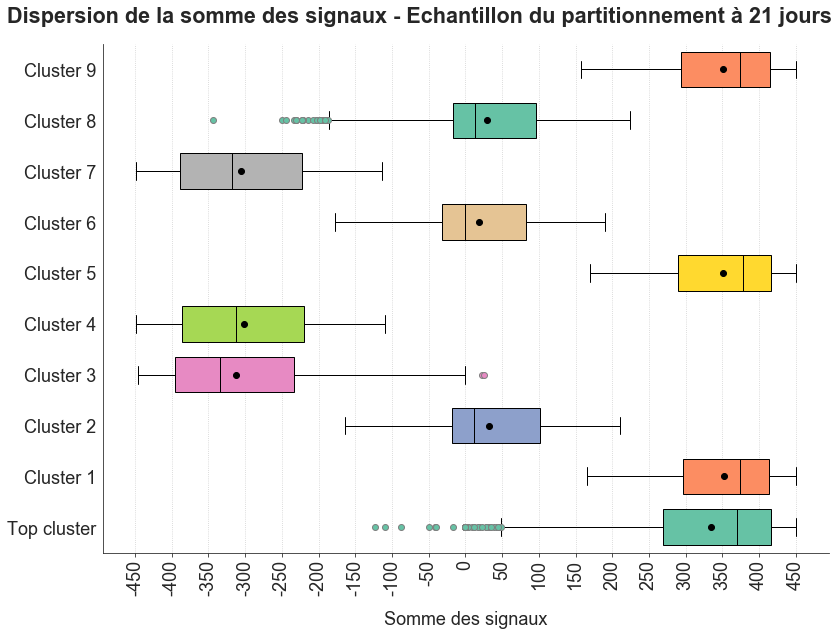

In [45]:
valeurs = [temp.get_group(True).somme_signaux]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].somme_signaux)
    catlabels.append("Cluster {}".format(clust))
graph71 = sfg.MyGraph(title="Dispersion de la somme des signaux - Echantillon du partitionnement à 21 jours")
graph71.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph71.set_axe('x', label="Somme des signaux", tick_min=-450, tick_max=450, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph71.fig, graph71.ax
plt.savefig("M3_dispersion_alea21.png")
plt.show()

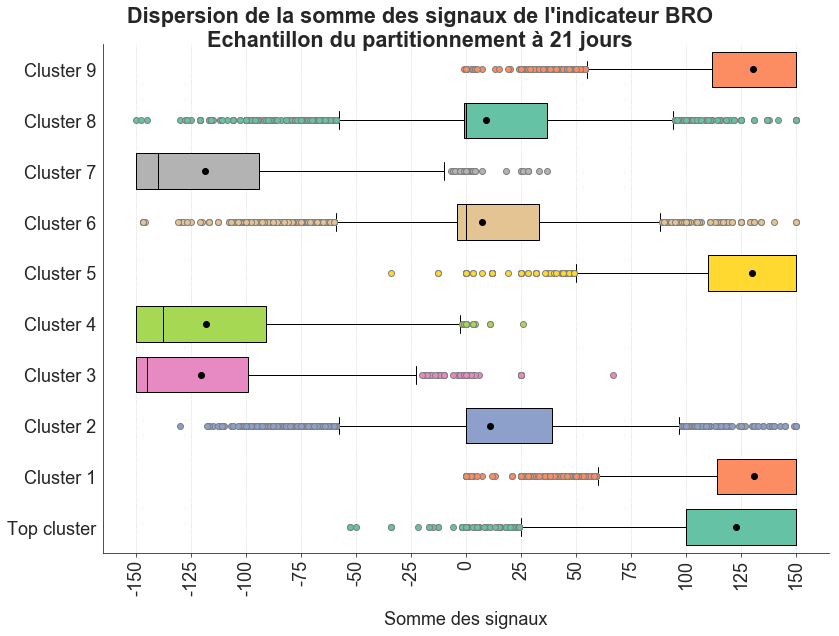

In [46]:
valeurs = [temp.get_group(True).BRO]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO)
    catlabels.append("Cluster {}".format(clust))
graph72 = sfg.MyGraph(title="Dispersion de la somme des signaux de l'indicateur BRO\nEchantillon du partitionnement à 21 jours")
graph72.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph72.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph72.fig, graph72.ax
plt.savefig("M3_dispersion_BRO_alea21.png")
plt.show()

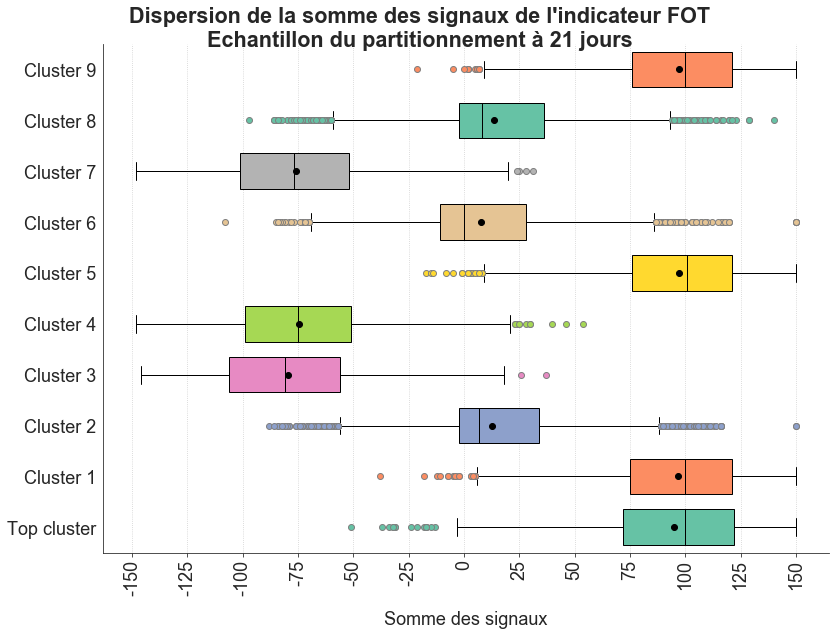

In [47]:
valeurs = [temp.get_group(True).FOT]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].FOT)
    catlabels.append("Cluster {}".format(clust))
graph73 = sfg.MyGraph(title="Dispersion de la somme des signaux de l'indicateur FOT\nEchantillon du partitionnement à 21 jours")
graph73.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph73.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph73.fig, graph73.ax
plt.savefig("M3_dispersion_FOT_alea21.png")
plt.show()

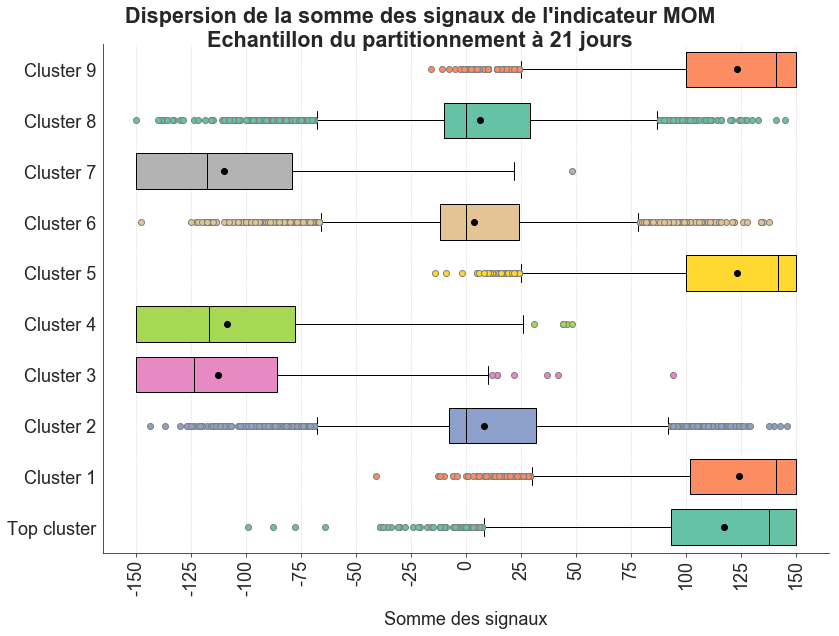

In [48]:
valeurs = [temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph74 = sfg.MyGraph(title="Dispersion de la somme des signaux de l'indicateur MOM\nEchantillon du partitionnement à 21 jours")
graph74.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph74.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph74.fig, graph74.ax
plt.savefig("M3_dispersion_MOM_alea21.png")
plt.show()

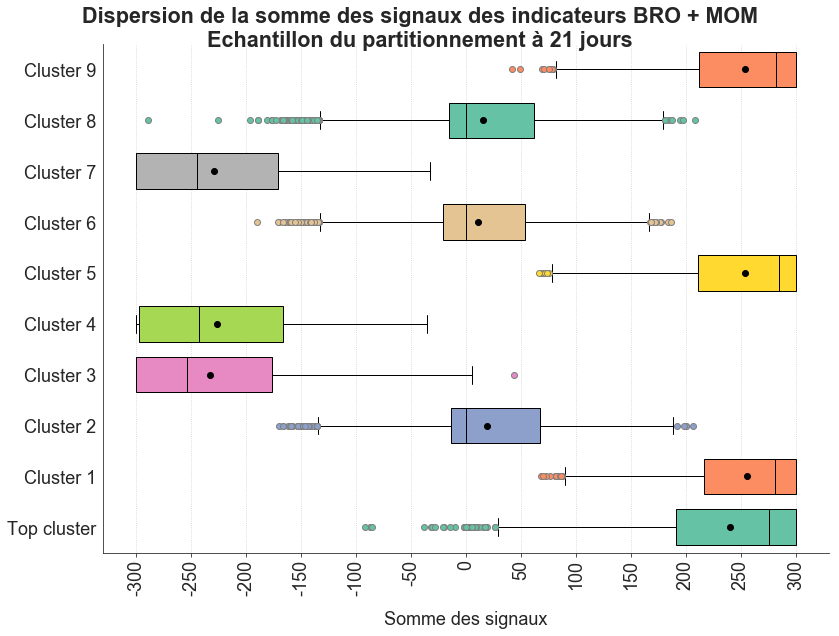

In [49]:
valeurs = [temp.get_group(True).BRO + temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO + temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph75 = sfg.MyGraph(title="Dispersion de la somme des signaux des indicateurs BRO + MOM\nEchantillon du partitionnement à 21 jours")
graph75.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph75.set_axe('x', label="Somme des signaux", tick_min=-300, tick_max=300, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph75.fig, graph75.ax
plt.savefig("M3_dispersion_BROMOM_alea21.png")
plt.show()

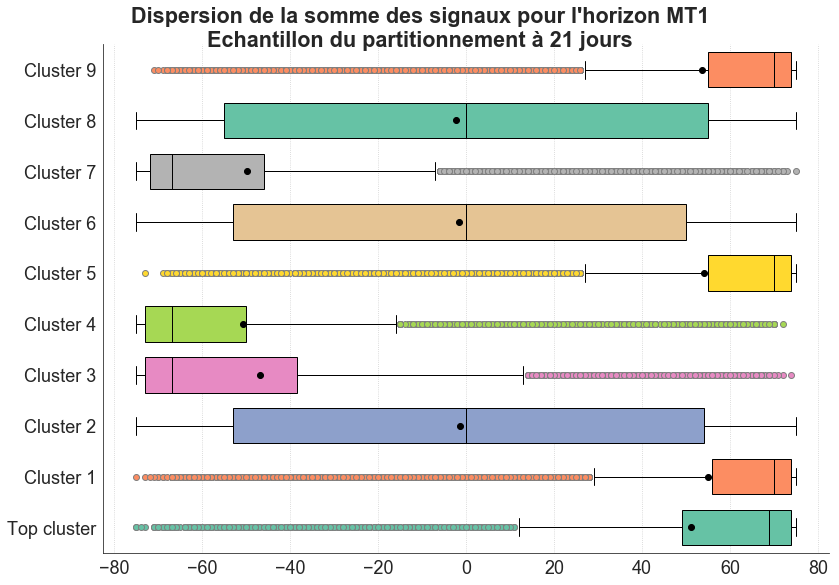

In [50]:
valeurs = [temp.get_group(True).MT1]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MT1)
    catlabels.append("Cluster {}".format(clust))
graph76 = sfg.MyGraph(title="Dispersion de la somme des signaux pour l'horizon MT1\nEchantillon du partitionnement à 21 jours")
graph76.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph76.fig, graph76.ax
plt.show()

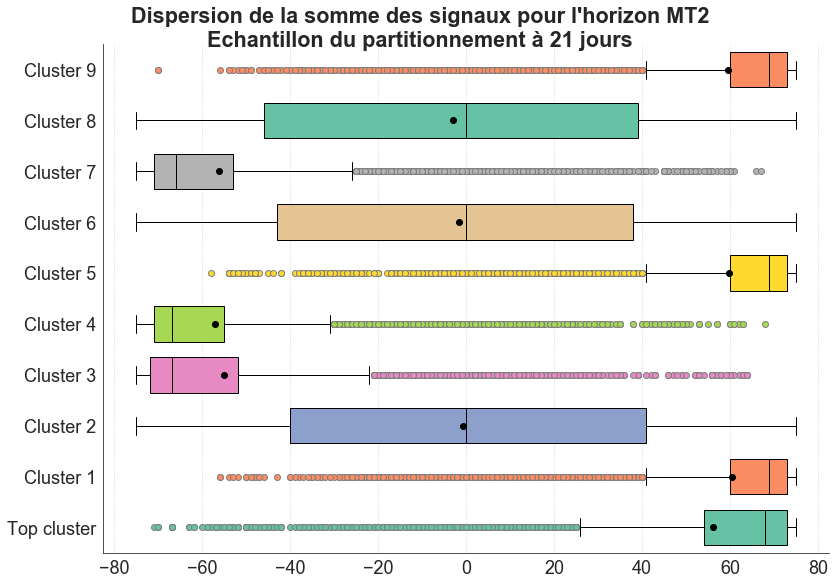

In [51]:
valeurs = [temp.get_group(True).MT2]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MT2)
    catlabels.append("Cluster {}".format(clust))
graph77 = sfg.MyGraph(title="Dispersion de la somme des signaux pour l'horizon MT2\nEchantillon du partitionnement à 21 jours")
graph77.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph77.fig, graph77.ax
plt.show()

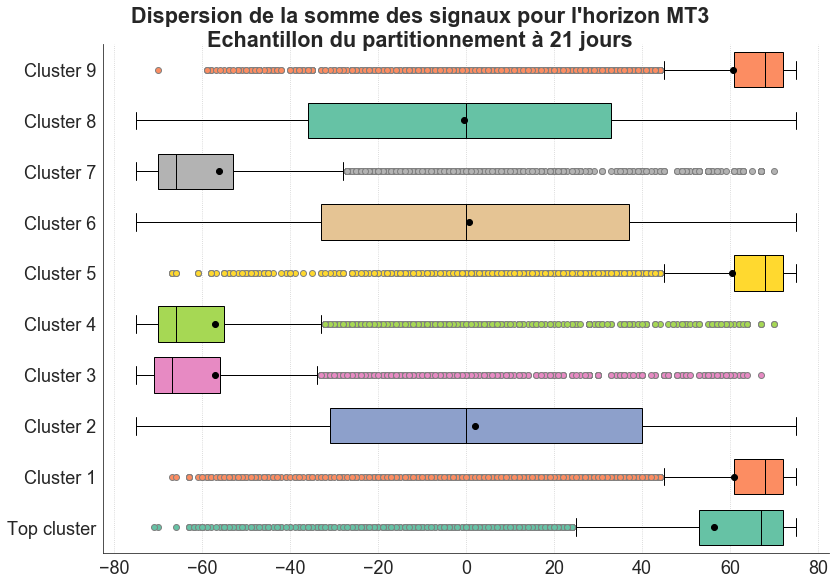

In [52]:
valeurs = [temp.get_group(True).MT3]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MT3)
    catlabels.append("Cluster {}".format(clust))
graph78 = sfg.MyGraph(title="Dispersion de la somme des signaux pour l'horizon MT3\nEchantillon du partitionnement à 21 jours")
graph78.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph78.fig, graph78.ax
plt.show()

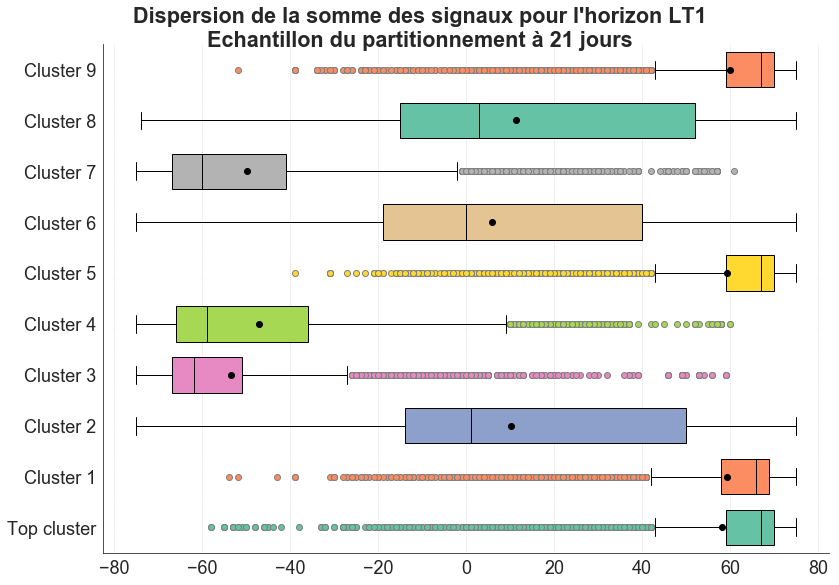

In [53]:
valeurs = [temp.get_group(True).LT1]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].LT1)
    catlabels.append("Cluster {}".format(clust))
graph79 = sfg.MyGraph(title="Dispersion de la somme des signaux pour l'horizon LT1\nEchantillon du partitionnement à 21 jours")
graph79.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph79.fig, graph79.ax
plt.show()

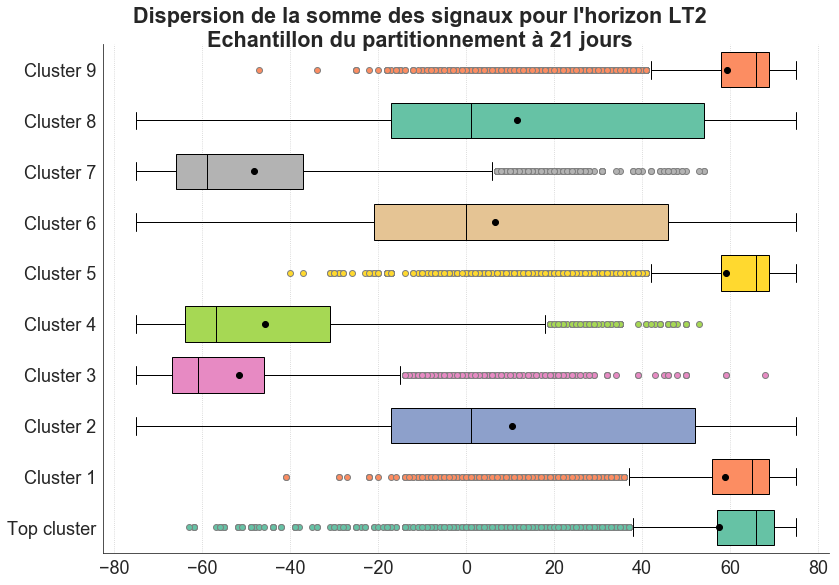

In [54]:
valeurs = [temp.get_group(True).LT2]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].LT2)
    catlabels.append("Cluster {}".format(clust))
graph80 = sfg.MyGraph(title="Dispersion de la somme des signaux pour l'horizon LT2\nEchantillon du partitionnement à 21 jours")
graph80.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph80.fig, graph80.ax
plt.show()

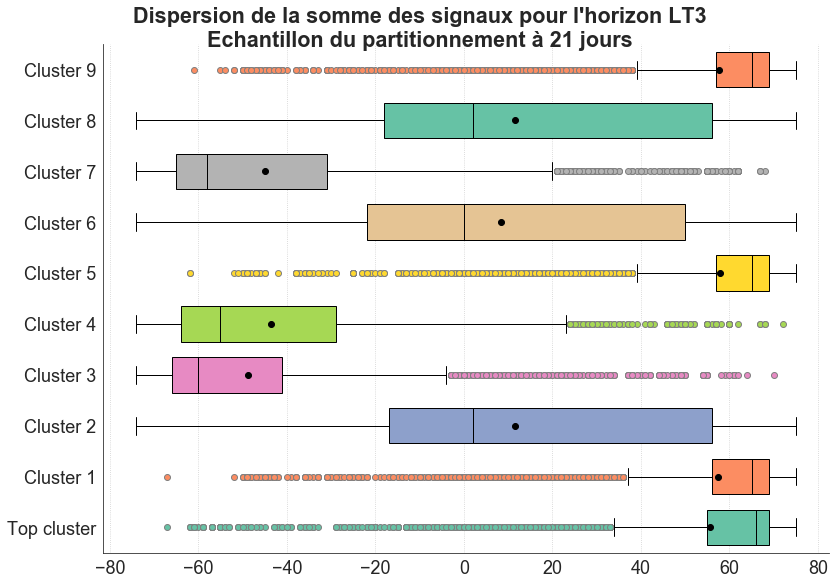

In [55]:
valeurs = [temp.get_group(True).LT3]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].LT3)
    catlabels.append("Cluster {}".format(clust))
graph81 = sfg.MyGraph(title="Dispersion de la somme des signaux pour l'horizon LT3\nEchantillon du partitionnement à 21 jours")
graph81.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph81.fig, graph81.ax
plt.show()

Sur l'échantillon aléatoire basé sur l'évolution des prix à un mois, la distinction par indicateur ou par horizon ne semble pas apporter de renseignements supplémentaires par rapport à la somme des signaux.

**Evolution des prix à 2 mois - Echantillon aléatoire**

In [56]:
temp = echant_alea_data42.groupby("top_cluster")

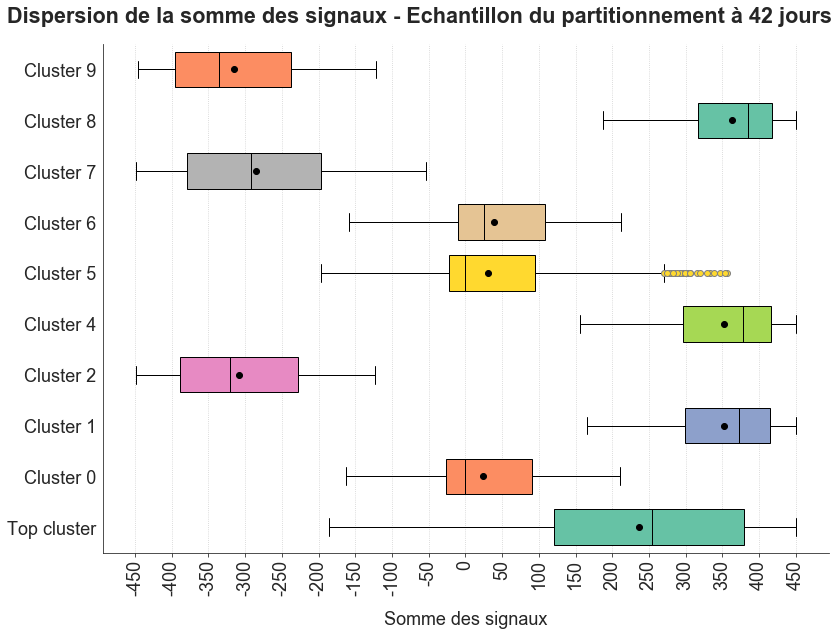

In [57]:
valeurs = [temp.get_group(True).somme_signaux]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].somme_signaux)
    catlabels.append("Cluster {}".format(clust))
graph82 = sfg.MyGraph(title="Dispersion de la somme des signaux - Echantillon du partitionnement à 42 jours")
graph82.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph82.set_axe('x', label="Somme des signaux", tick_min=-450, tick_max=450, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph82.fig, graph82.ax
plt.savefig("M3_dispersion_alea42.png")
plt.show()

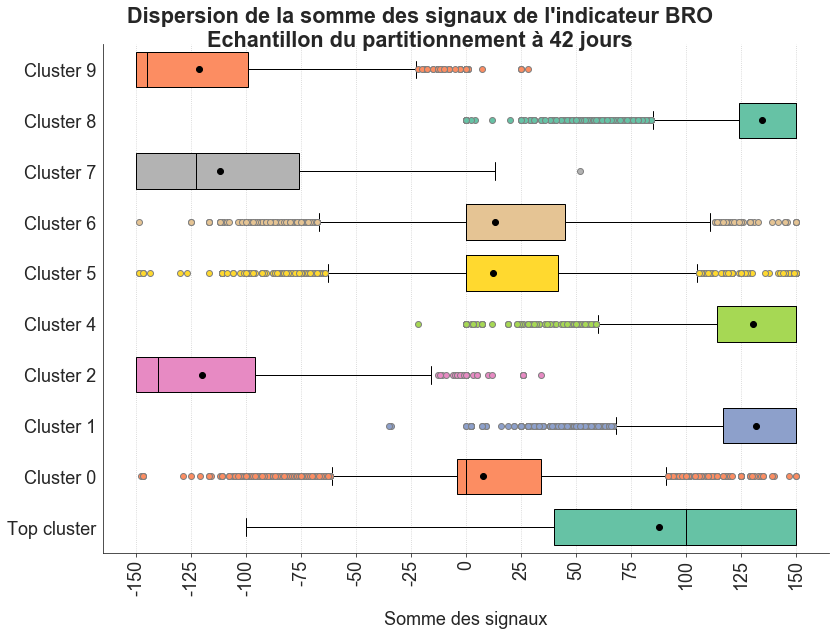

In [58]:
valeurs = [temp.get_group(True).BRO]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO)
    catlabels.append("Cluster {}".format(clust))
graph83 = sfg.MyGraph(title="Dispersion de la somme des signaux de l'indicateur BRO\nEchantillon du partitionnement à 42 jours")
graph83.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph83.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph83.fig, graph83.ax
plt.savefig("M3_dispersion_BRO_alea42.png")
plt.show()

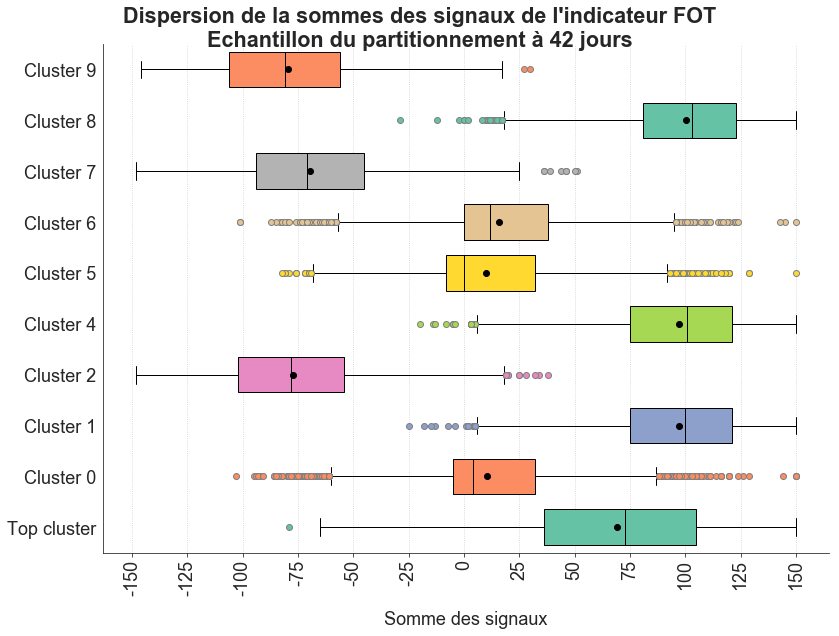

In [59]:
valeurs = [temp.get_group(True).FOT]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].FOT)
    catlabels.append("Cluster {}".format(clust))
graph84 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur FOT\nEchantillon du partitionnement à 42 jours")
graph84.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph84.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph84.fig, graph84.ax
plt.savefig("M3_dispersion_FOT_alea42.png")
plt.show()

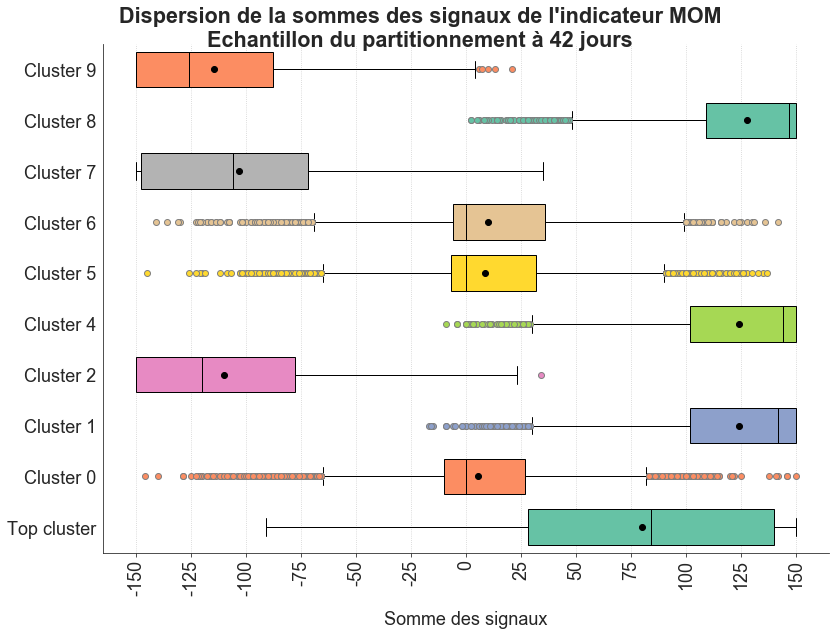

In [60]:
valeurs = [temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph85 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur MOM\nEchantillon du partitionnement à 42 jours")
graph85.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph85.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph85.fig, graph85.ax
plt.savefig("M3_dispersion_MOM_alea42.png")
plt.show()

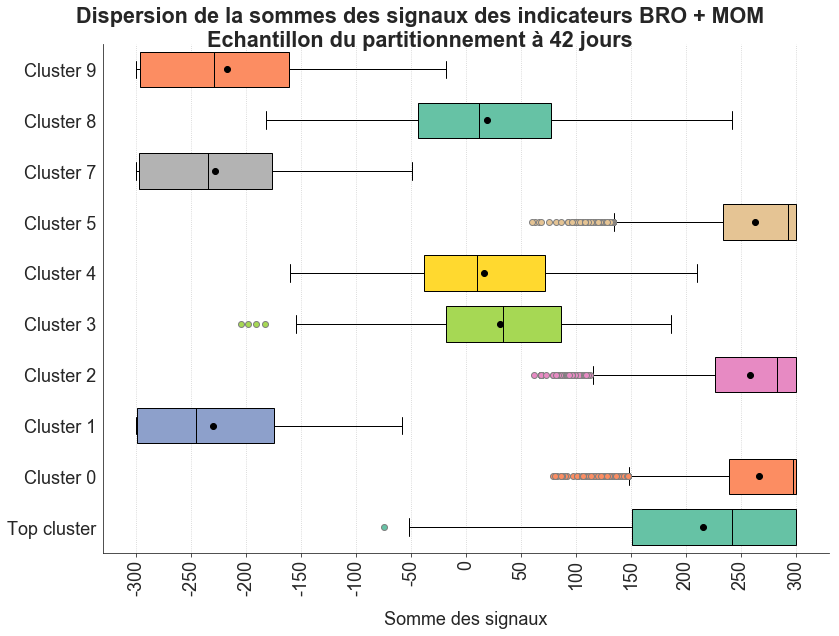

In [100]:
valeurs = [temp.get_group(True).BRO + temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO + temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph86 = sfg.MyGraph(title="Dispersion de la sommes des signaux des indicateurs BRO + MOM\nEchantillon du partitionnement à 42 jours")
graph86.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph86.set_axe('x', label="Somme des signaux", tick_min=-300, tick_max=300, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph86.fig, graph86.ax
plt.savefig("M3_dispersion_BROMOM_alea42.png")
plt.show()

Sur l'horizon à 2 mois, les sommes de signaux par indicateur semblent permettre de distinguer le top cluster des autres. Cela amène à se demander si on ne peut pas modéliser l'appartenance au top cluster par une regression logistique.

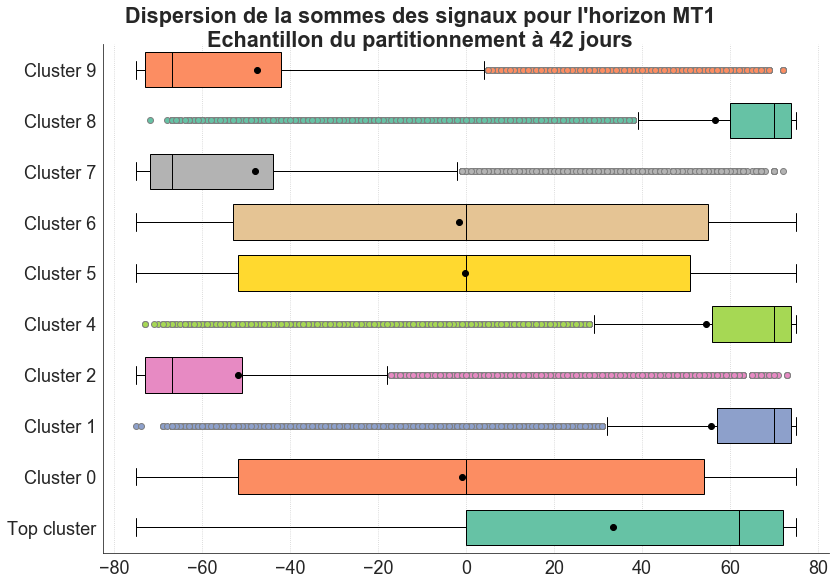

In [62]:
valeurs = [temp.get_group(True).MT1]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MT1)
    catlabels.append("Cluster {}".format(clust))
graph87 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon MT1\nEchantillon du partitionnement à 42 jours")
graph87.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph87.fig, graph87.ax
plt.show()

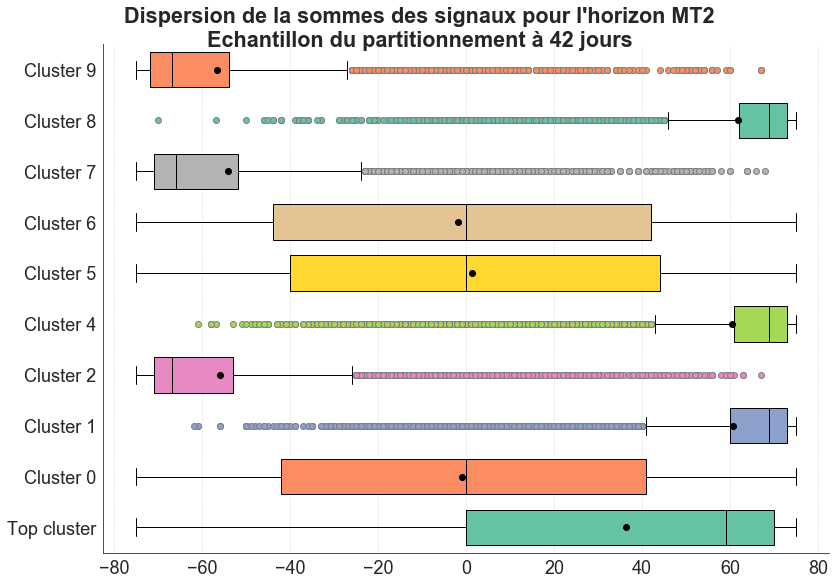

In [63]:
valeurs = [temp.get_group(True).MT2]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MT2)
    catlabels.append("Cluster {}".format(clust))
graph88 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon MT2\nEchantillon du partitionnement à 42 jours")
graph88.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph88.fig, graph88.ax
plt.show()

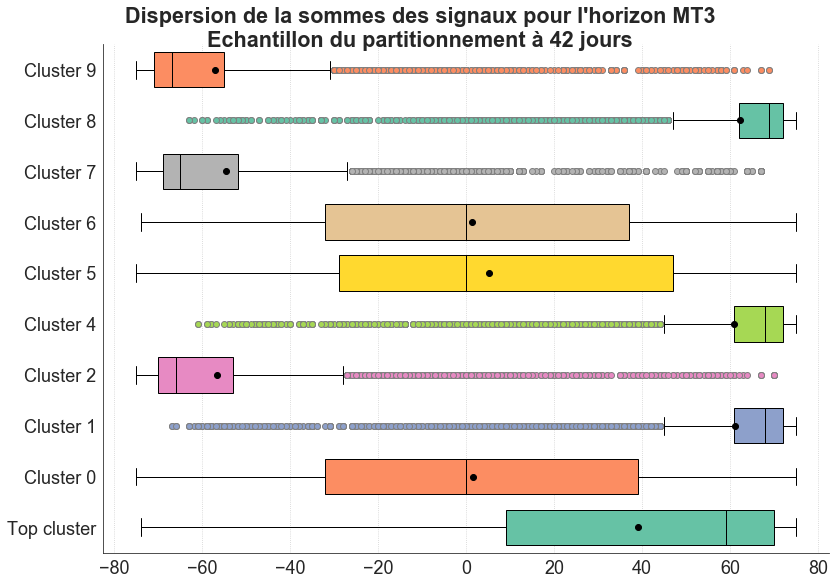

In [64]:
valeurs = [temp.get_group(True).MT3]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MT3)
    catlabels.append("Cluster {}".format(clust))
graph89 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon MT3\nEchantillon du partitionnement à 42 jours")
graph89.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph89.fig, graph89.ax
plt.show()

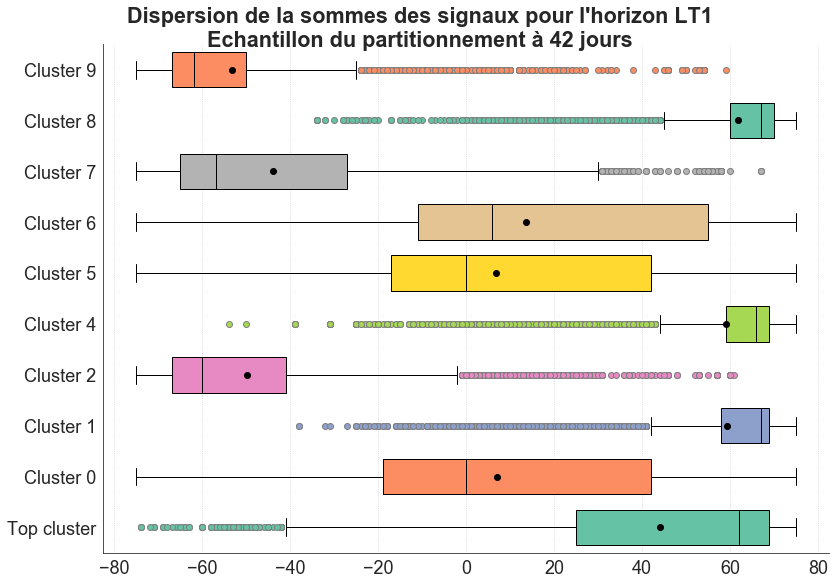

In [65]:
valeurs = [temp.get_group(True).LT1]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].LT1)
    catlabels.append("Cluster {}".format(clust))
graph90 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon LT1\nEchantillon du partitionnement à 42 jours")
graph90.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph90.fig, graph90.ax
plt.show()

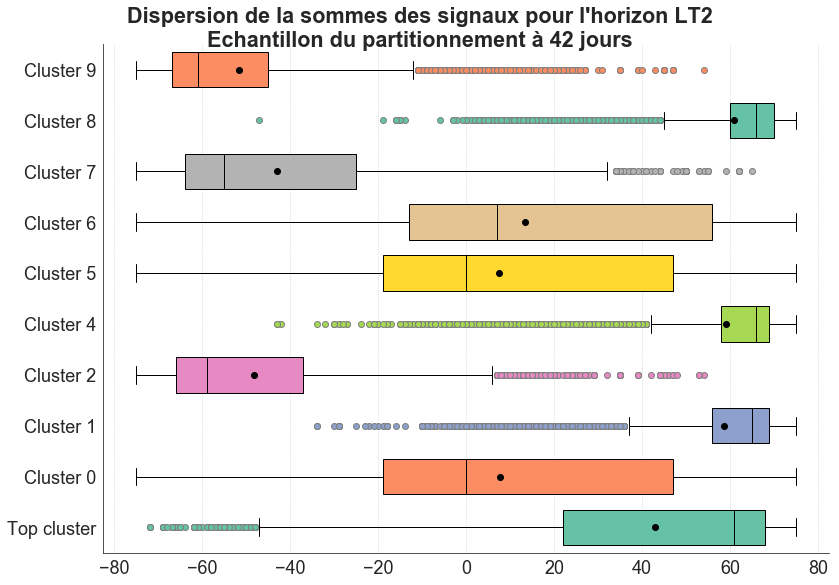

In [66]:
valeurs = [temp.get_group(True).LT2]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].LT2)
    catlabels.append("Cluster {}".format(clust))
graph91 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon LT2\nEchantillon du partitionnement à 42 jours")
graph91.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph91.fig, graph91.ax
plt.show()

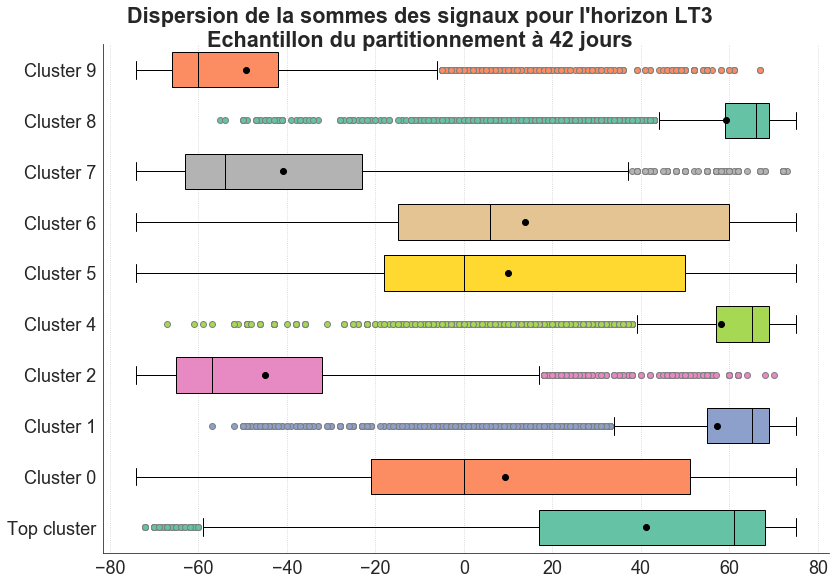

In [67]:
valeurs = [temp.get_group(True).LT3]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].LT3)
    catlabels.append("Cluster {}".format(clust))
graph92 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon LT3\nEchantillon du partitionnement à 42 jours")
graph92.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph92.fig, graph92.ax
plt.show()

Comme nos analyses précédentes le laissaient penser, les distinctions par horizons temporels ne sont pas efficaces pour discriminer le top_cluster des autres données. La somme des signaux, globale ou par indicateur, semble le seul moyen pour pouvoir estimer si un individu appartient au top_cluster.

**Evolution des prix à 3 mois - Echantillon aléatoire**

In [68]:
temp = echant_alea_data64.groupby("top_cluster")

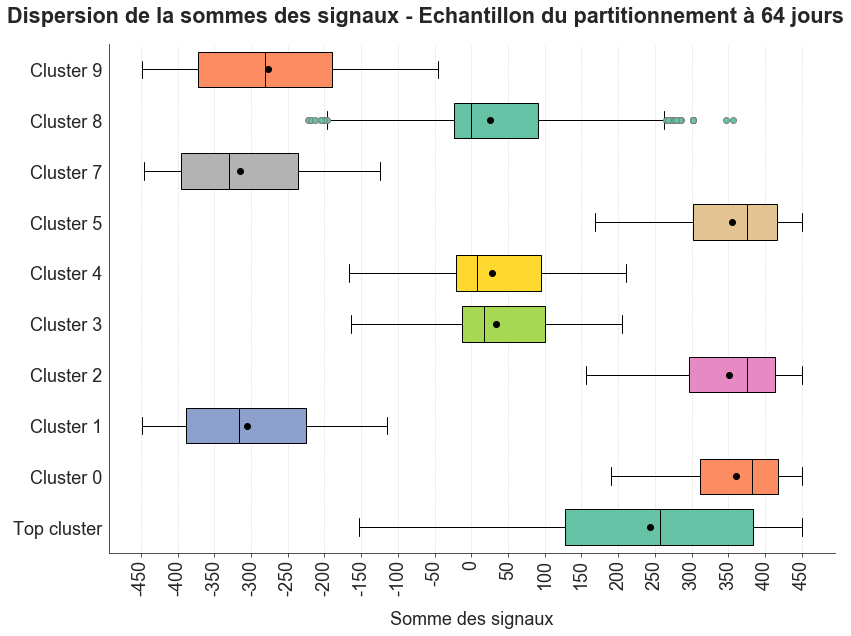

In [69]:
valeurs = [temp.get_group(True).somme_signaux]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].somme_signaux)
    catlabels.append("Cluster {}".format(clust))
graph93 = sfg.MyGraph(title="Dispersion de la sommes des signaux - Echantillon du partitionnement à 64 jours")
graph93.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph93.set_axe('x', label="Somme des signaux", tick_min=-450, tick_max=450, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph93.fig, graph93.ax
plt.savefig("M3_dispersion_alea64.png")
plt.show()

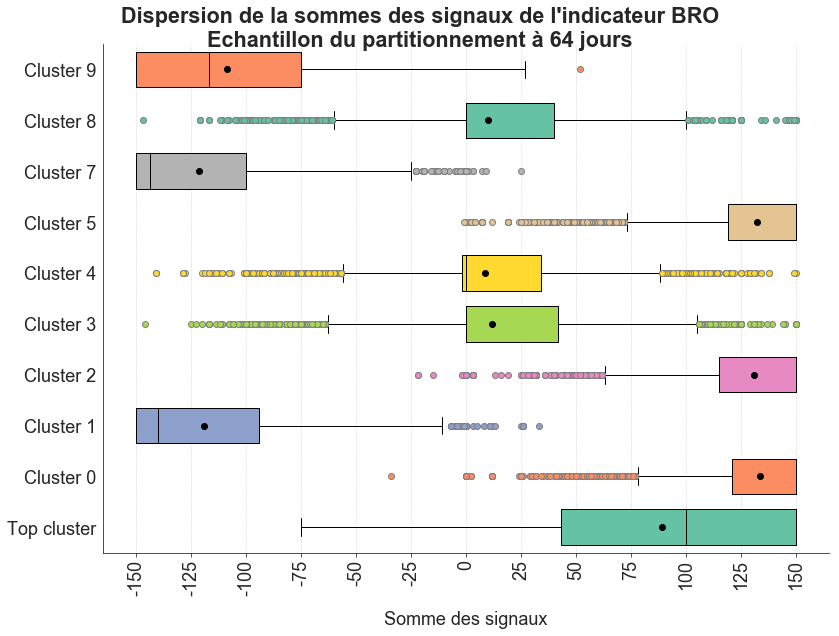

In [70]:
valeurs = [temp.get_group(True).BRO]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO)
    catlabels.append("Cluster {}".format(clust))
graph94 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur BRO\nEchantillon du partitionnement à 64 jours")
graph94.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph94.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph94.fig, graph94.ax
plt.savefig("M3_dispersion_BRO_alea64.png")
plt.show()

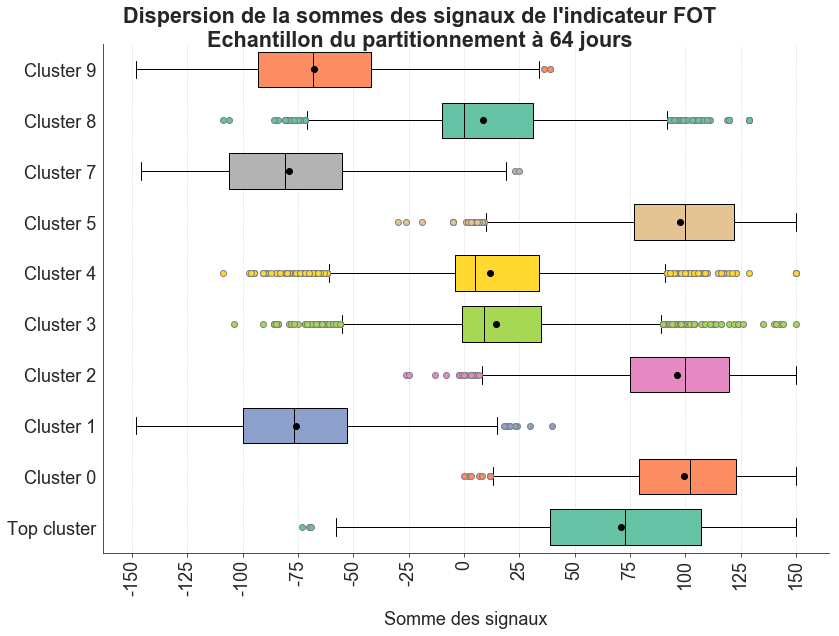

In [71]:
valeurs = [temp.get_group(True).FOT]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].FOT)
    catlabels.append("Cluster {}".format(clust))
graph95 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur FOT\nEchantillon du partitionnement à 64 jours")
graph95.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph95.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph95.fig, graph95.ax
plt.savefig("M3_dispersion_FOT_alea64.png")
plt.show()

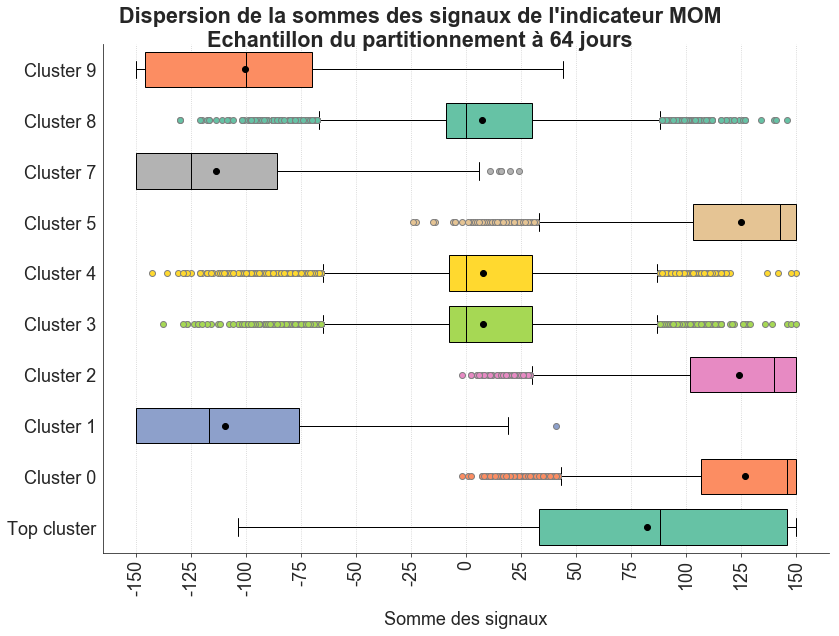

In [72]:
valeurs = [temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph96 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur MOM\nEchantillon du partitionnement à 64 jours")
graph96.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph96.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph96.fig, graph96.ax
plt.savefig("M3_dispersion_MOM_alea64.png")
plt.show()

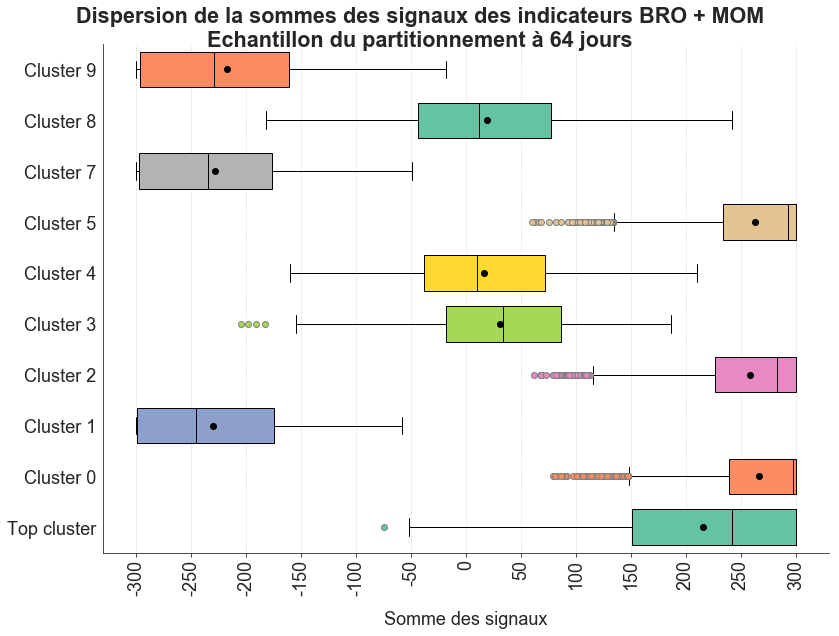

In [101]:
valeurs = [temp.get_group(True).BRO + temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO + temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph97 = sfg.MyGraph(title="Dispersion de la sommes des signaux des indicateurs BRO + MOM\nEchantillon du partitionnement à 64 jours")
graph97.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph97.set_axe('x', label="Somme des signaux", tick_min=-300, tick_max=300, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph97.fig, graph97.ax
plt.savefig("M3_dispersion_BROMOM_alea64.png")
plt.show()

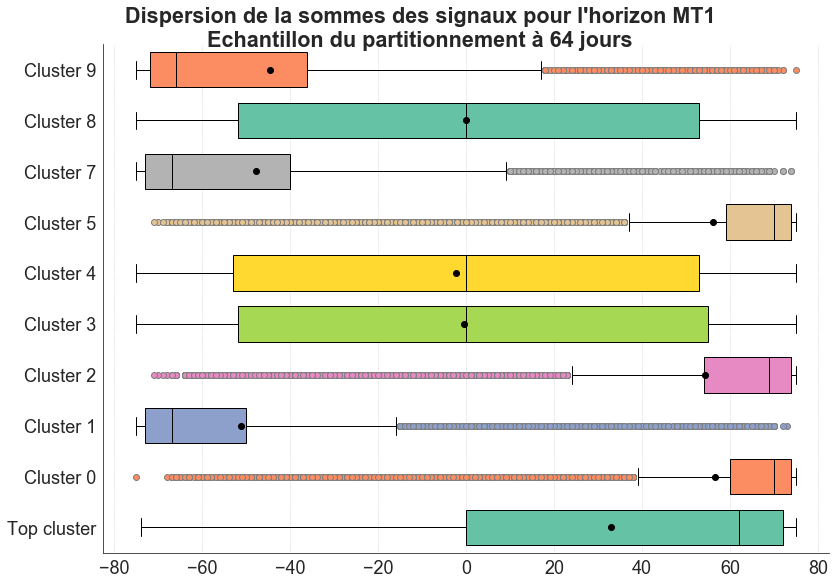

In [74]:
valeurs = [temp.get_group(True).MT1]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MT1)
    catlabels.append("Cluster {}".format(clust))
graph98 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon MT1\nEchantillon du partitionnement à 64 jours")
graph98.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph98.fig, graph98.ax
plt.show()

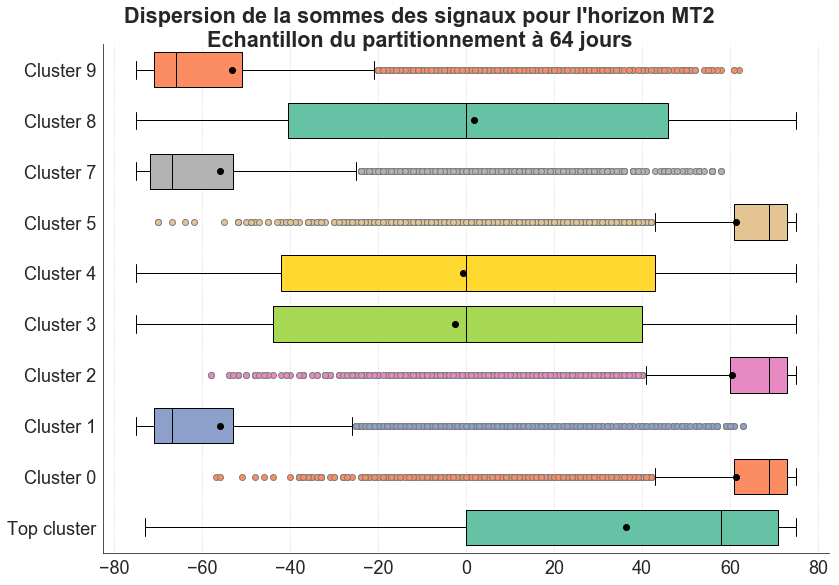

In [75]:
valeurs = [temp.get_group(True).MT2]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MT2)
    catlabels.append("Cluster {}".format(clust))
graph99 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon MT2\nEchantillon du partitionnement à 64 jours")
graph99.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph99.fig, graph99.ax
plt.show()

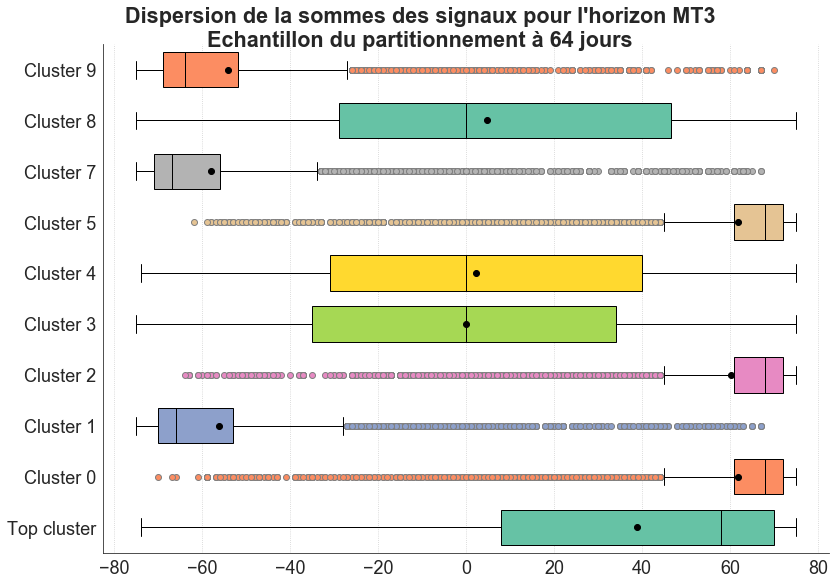

In [76]:
valeurs = [temp.get_group(True).MT3]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MT3)
    catlabels.append("Cluster {}".format(clust))
graph100 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon MT3\nEchantillon du partitionnement à 64 jours")
graph100.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph100.fig, graph100.ax
plt.show()

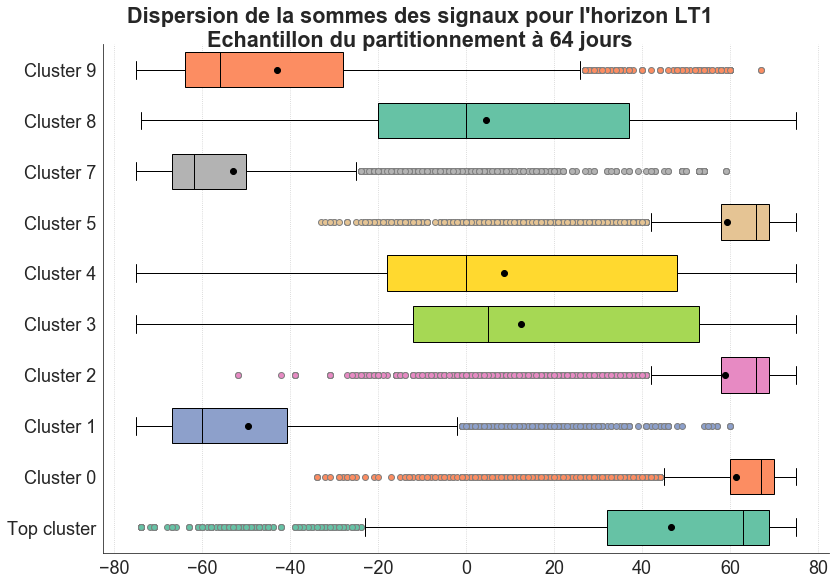

In [77]:
valeurs = [temp.get_group(True).LT1]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].LT1)
    catlabels.append("Cluster {}".format(clust))
graph101 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon LT1\nEchantillon du partitionnement à 64 jours")
graph101.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph101.fig, graph101.ax
plt.show()

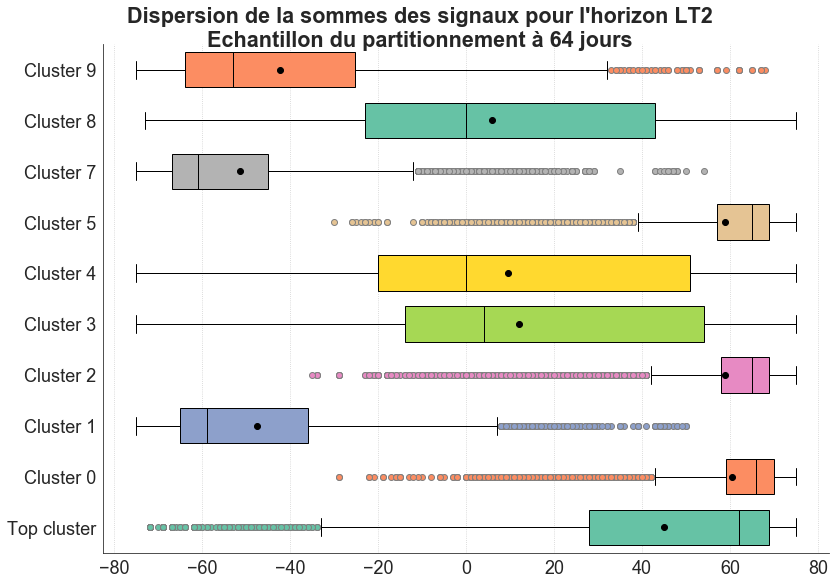

In [78]:
valeurs = [temp.get_group(True).LT2]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].LT2)
    catlabels.append("Cluster {}".format(clust))
graph102 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon LT2\nEchantillon du partitionnement à 64 jours")
graph102.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph102.fig, graph102.ax
plt.show()

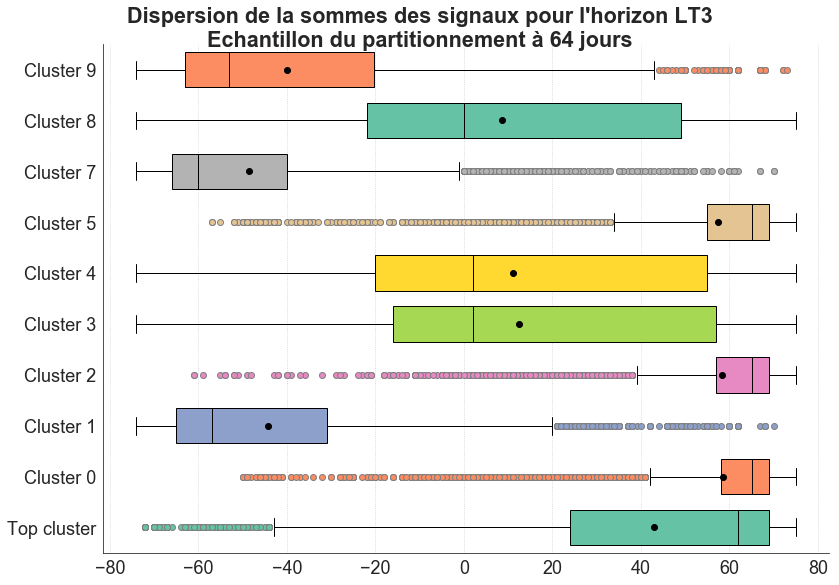

In [79]:
valeurs = [temp.get_group(True).LT3]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].LT3)
    catlabels.append("Cluster {}".format(clust))
graph103 = sfg.MyGraph(title="Dispersion de la sommes des signaux pour l'horizon LT3\nEchantillon du partitionnement à 64 jours")
graph103.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
fig, ax = graph103.fig, graph103.ax
plt.show()

Comme pour l'horizon à 2 mois, les distinctions par horizons temporels ne sont pas efficaces pour discriminer le top_cluster des autres données avec l'horizon à 3 mois. La somme des signaux, globale ou par indicateur, semble le seul moyen pour pouvoir estimer si un individu appartient au top_cluster.

Toutefois, il semble que la somme des signaux, au global ou par indicateur, permette de distinguer le top cluster plus facilement pour l'évolution des prix à 2 mois.

**Evolution des prix à 1 mois - Echantillon basé sur les dates**

In [80]:
temp = echant_annees_data21.groupby("top_cluster")

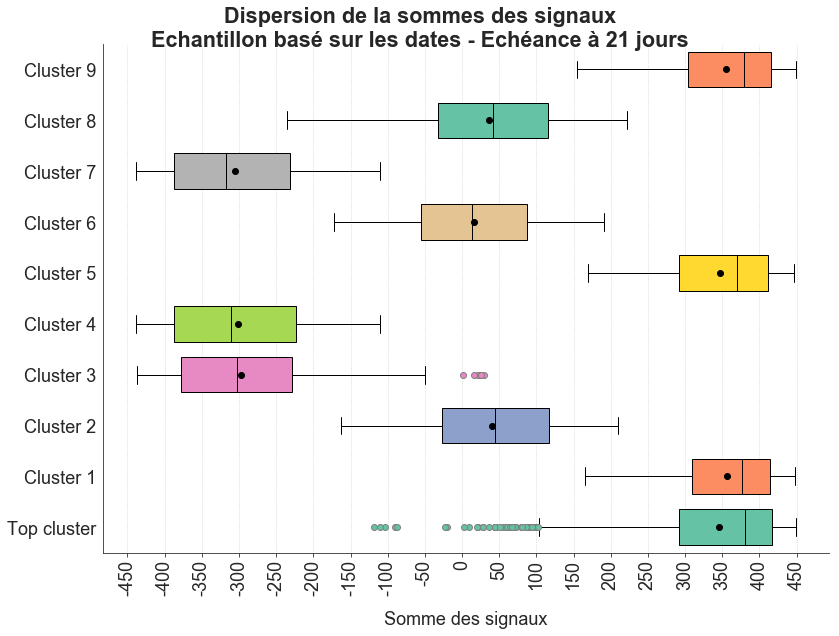

In [81]:
valeurs = [temp.get_group(True).somme_signaux]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].somme_signaux)
    catlabels.append("Cluster {}".format(clust))
graph111 = sfg.MyGraph(title="Dispersion de la sommes des signaux\nEchantillon basé sur les dates - Echéance à 21 jours")
graph111.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph111.set_axe('x', label="Somme des signaux", tick_min=-450, tick_max=450, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph111.fig, graph111.ax
plt.savefig("M3_dispersion_date21.png")
plt.show()

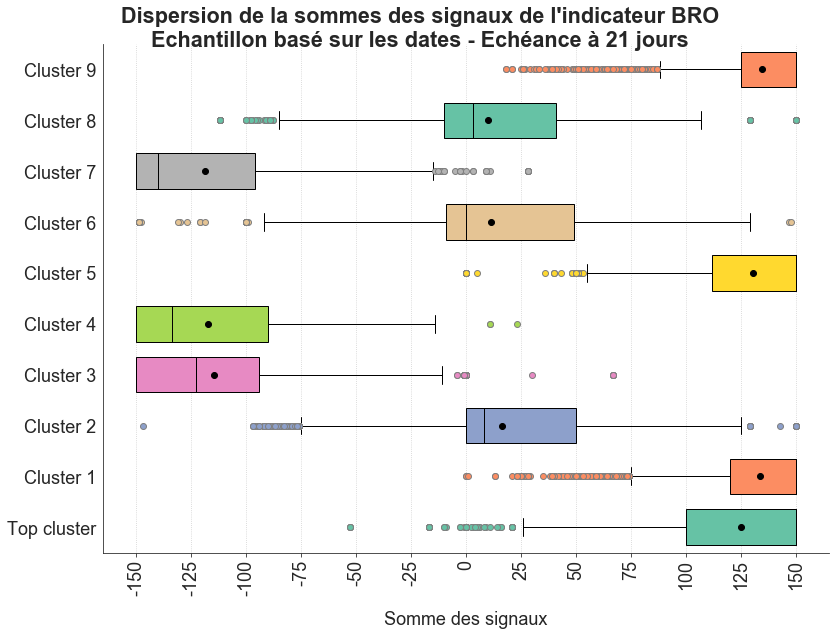

In [82]:
valeurs = [temp.get_group(True).BRO]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO)
    catlabels.append("Cluster {}".format(clust))
graph112 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur BRO\nEchantillon basé sur les dates - Echéance à 21 jours")
graph112.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph112.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph112.fig, graph112.ax
plt.savefig("M3_dispersion_BRO_date21.png")
plt.show()

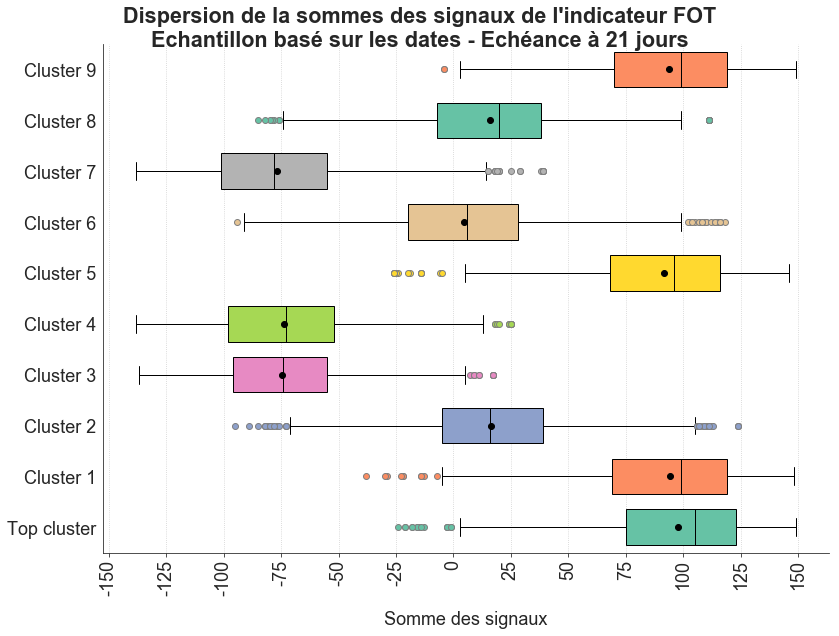

In [83]:
valeurs = [temp.get_group(True).FOT]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].FOT)
    catlabels.append("Cluster {}".format(clust))
graph113 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur FOT\nEchantillon basé sur les dates - Echéance à 21 jours")
graph113.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph113.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph113.fig, graph113.ax
plt.savefig("M3_dispersion_FOT_date21.png")
plt.show()

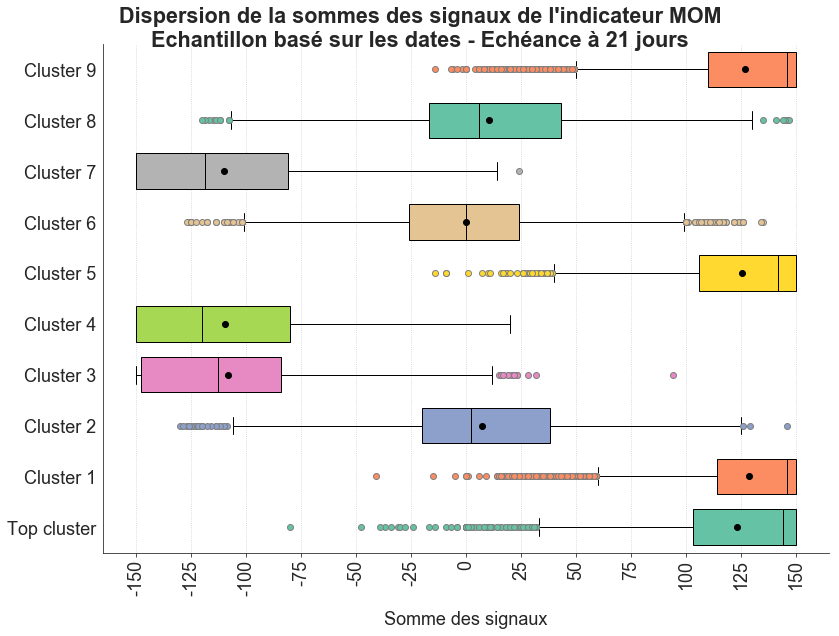

In [84]:
valeurs = [temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph114 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur MOM\nEchantillon basé sur les dates - Echéance à 21 jours")
graph114.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph114.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph114.fig, graph114.ax
plt.savefig("M3_dispersion_MOM_date21.png")
plt.show()

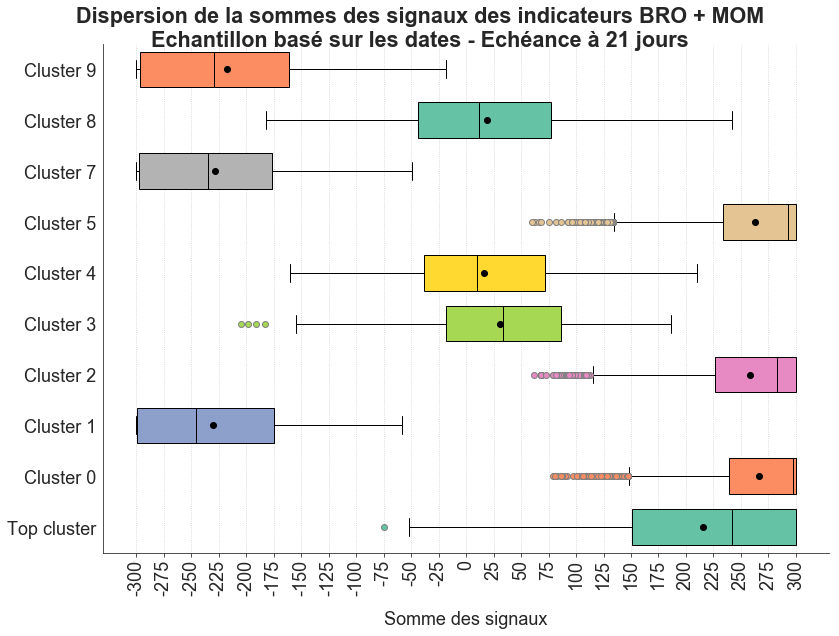

In [102]:
valeurs = [temp.get_group(True).BRO + temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO + temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph115 = sfg.MyGraph(title="Dispersion de la sommes des signaux des indicateurs BRO + MOM\nEchantillon basé sur les dates - Echéance à 21 jours")
graph115.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph115.set_axe('x', label="Somme des signaux", tick_min=-300, tick_max=300, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph115.fig, graph115.ax
plt.savefig("M3_dispersion_BROMOM_date21.png")
plt.show()

**Evolution des prix à 2 mois - Echantillon basé sur les dates**

In [86]:
temp = echant_annees_data42.groupby("top_cluster")

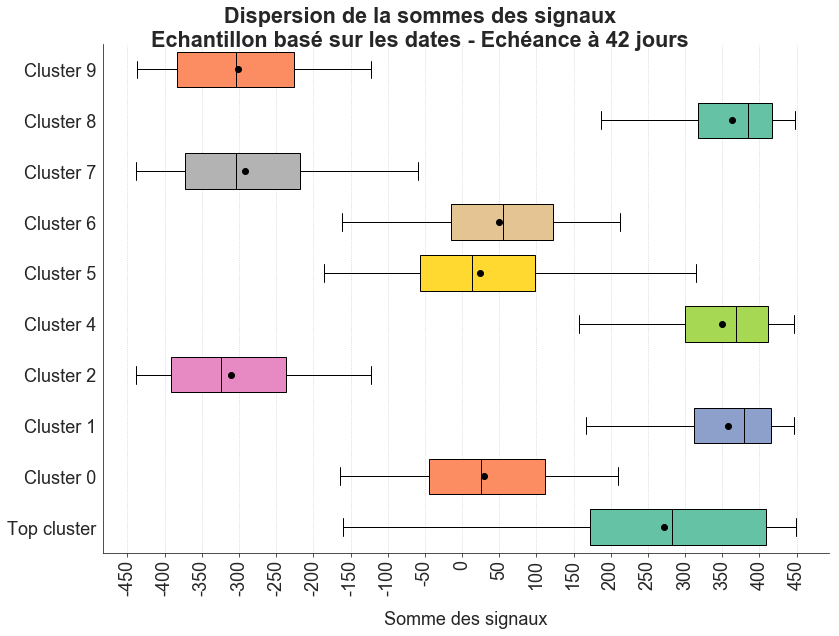

In [87]:
valeurs = [temp.get_group(True).somme_signaux]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].somme_signaux)
    catlabels.append("Cluster {}".format(clust))
graph116 = sfg.MyGraph(title="Dispersion de la sommes des signaux\nEchantillon basé sur les dates - Echéance à 42 jours")
graph116.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph116.set_axe('x', label="Somme des signaux", tick_min=-450, tick_max=450, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph116.fig, graph116.ax
plt.savefig("M3_dispersion_date42.png")
plt.show()

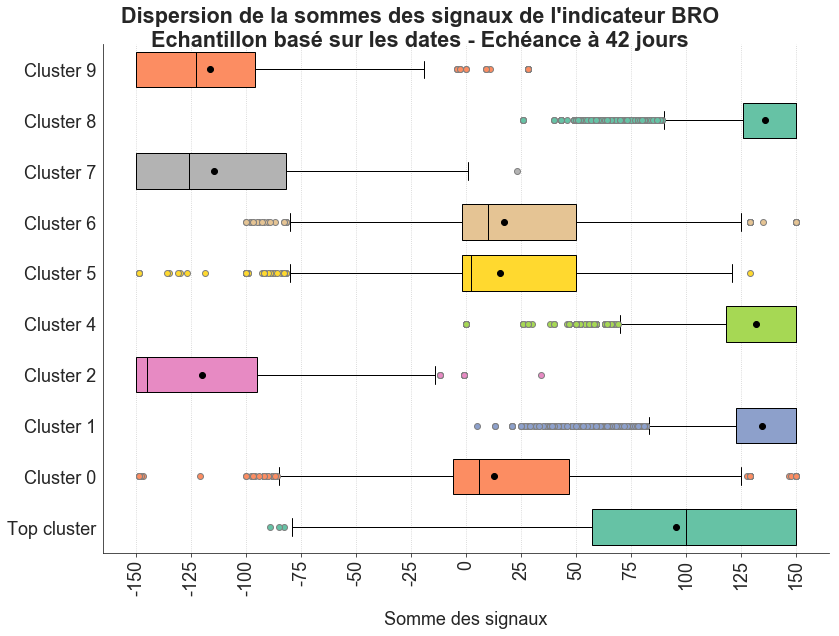

In [88]:
valeurs = [temp.get_group(True).BRO]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO)
    catlabels.append("Cluster {}".format(clust))
graph117 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur BRO\nEchantillon basé sur les dates - Echéance à 42 jours")
graph117.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph117.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph117.fig, graph117.ax
plt.savefig("M3_dispersion_BRO_date42.png")
plt.show()

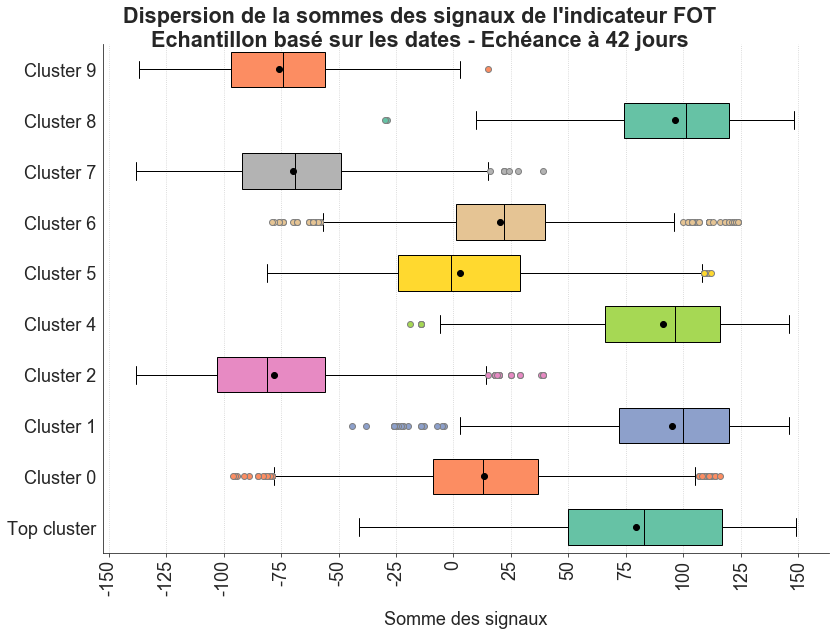

In [89]:
valeurs = [temp.get_group(True).FOT]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].FOT)
    catlabels.append("Cluster {}".format(clust))
graph118 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur FOT\nEchantillon basé sur les dates - Echéance à 42 jours")
graph118.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph118.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph118.fig, graph118.ax
plt.savefig("M3_dispersion_FOT_date42.png")
plt.show()

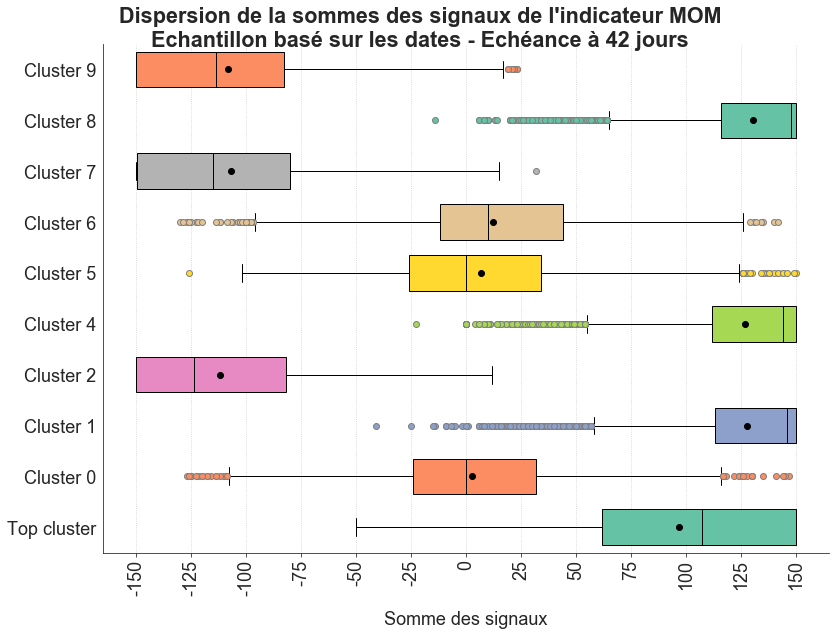

In [90]:
valeurs = [temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph119 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur MOM\nEchantillon basé sur les dates - Echéance à 42 jours")
graph119.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph119.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph119.fig, graph119.ax
plt.savefig("M3_dispersion_MOM_date42.png")
plt.show()

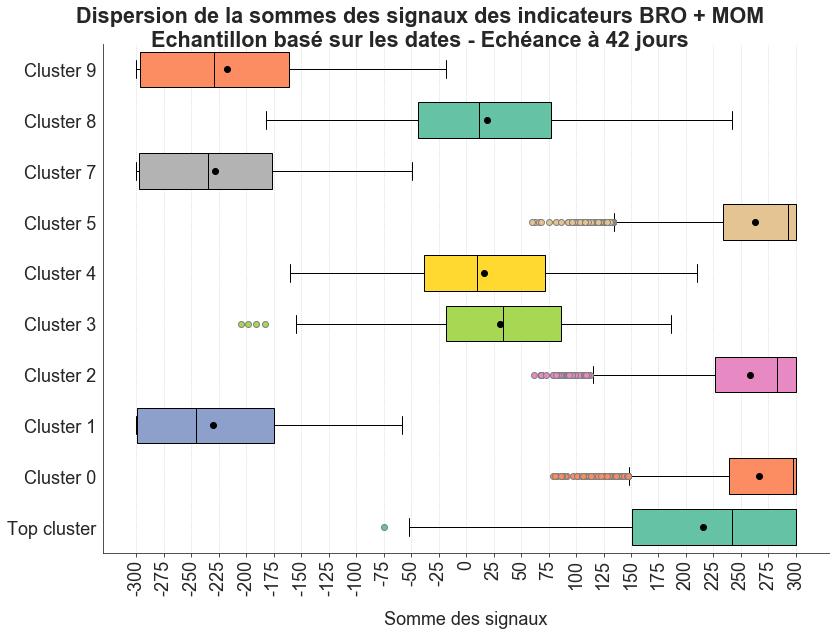

In [103]:
valeurs = [temp.get_group(True).BRO + temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO + temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph120 = sfg.MyGraph(title="Dispersion de la sommes des signaux des indicateurs BRO + MOM\nEchantillon basé sur les dates - Echéance à 42 jours")
graph120.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph120.set_axe('x', label="Somme des signaux", tick_min=-300, tick_max=300, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph120.fig, graph120.ax
plt.savefig("M3_dispersion_BROMOM_date42.png")
plt.show()

**Evolution des prix à 3 mois - Echantillon basé sur les dates**

In [92]:
temp = echant_annees_data64.groupby("top_cluster")

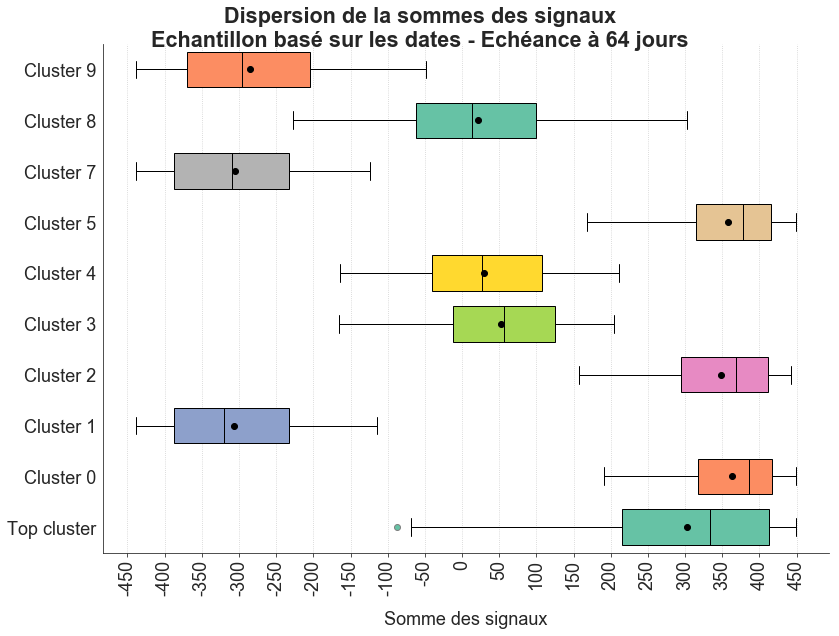

In [93]:
valeurs = [temp.get_group(True).somme_signaux]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].somme_signaux)
    catlabels.append("Cluster {}".format(clust))
graph121 = sfg.MyGraph(title="Dispersion de la sommes des signaux\nEchantillon basé sur les dates - Echéance à 64 jours")
graph121.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph121.set_axe('x', label="Somme des signaux", tick_min=-450, tick_max=450, tick_step=50, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph121.fig, graph121.ax
plt.savefig("M3_dispersion_date64.png")
plt.show()

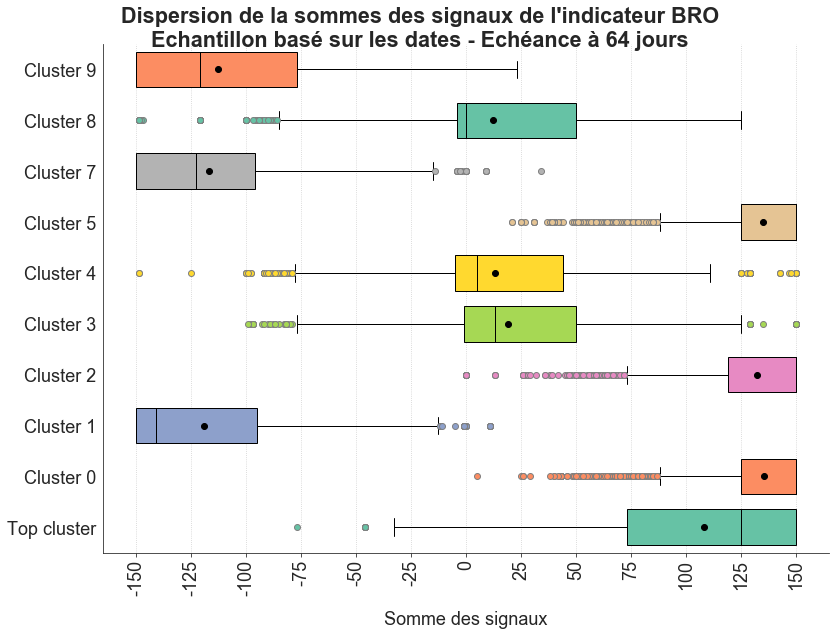

In [94]:
valeurs = [temp.get_group(True).BRO]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO)
    catlabels.append("Cluster {}".format(clust))
graph122 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur BRO\nEchantillon basé sur les dates - Echéance à 64 jours")
graph122.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph122.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph122.fig, graph122.ax
plt.savefig("M3_dispersion_BRO_date64.png")
plt.show()

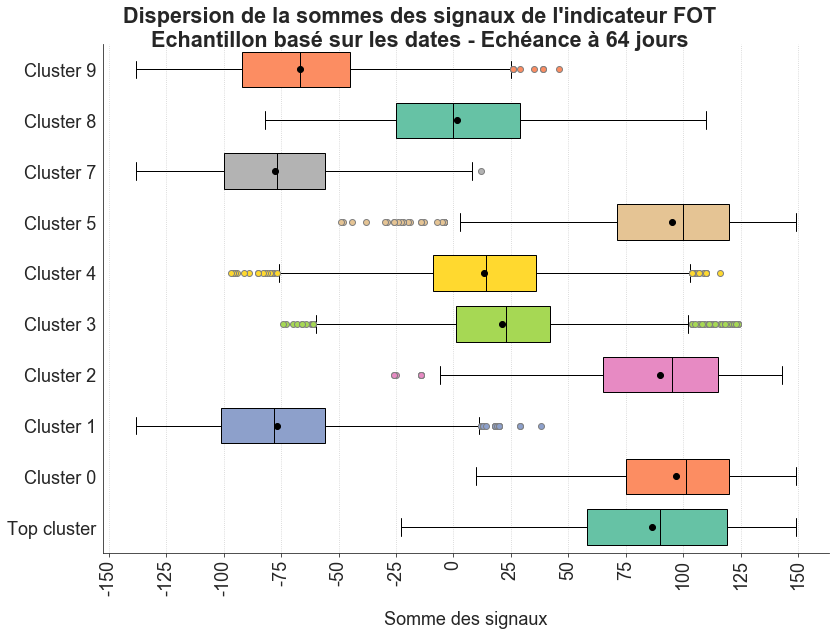

In [95]:
valeurs = [temp.get_group(True).FOT]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].FOT)
    catlabels.append("Cluster {}".format(clust))
graph123 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur FOT\nEchantillon basé sur les dates - Echéance à 64 jours")
graph123.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph123.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph123.fig, graph123.ax
plt.savefig("M3_dispersion_FOT_date64.png")
plt.show()

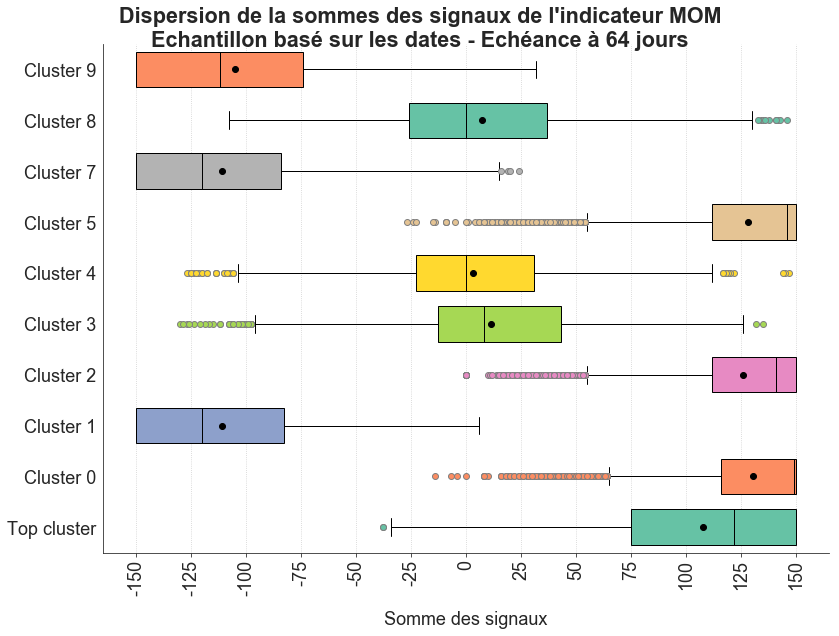

In [96]:
valeurs = [temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph124 = sfg.MyGraph(title="Dispersion de la sommes des signaux de l'indicateur MOM\nEchantillon basé sur les dates - Echéance à 64 jours")
graph124.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph124.set_axe('x', label="Somme des signaux", tick_min=-150, tick_max=150, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph124.fig, graph124.ax
plt.savefig("M3_dispersion_MOM_date64.png")
plt.show()

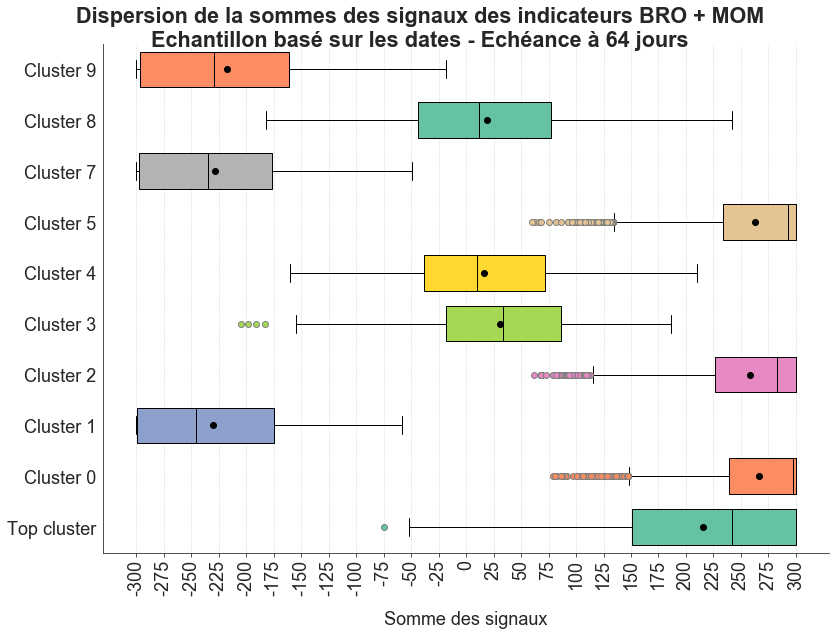

In [104]:
valeurs = [temp.get_group(True).BRO + temp.get_group(True).MOM]
catlabels = ["Top cluster"]
for clust in np.sort(temp.get_group(False).cluster.unique()):
    valeurs.append(temp.get_group(False)[temp.get_group(False).cluster==clust].BRO + temp.get_group(False)[temp.get_group(False).cluster==clust].MOM)
    catlabels.append("Cluster {}".format(clust))
graph125 = sfg.MyGraph(title="Dispersion de la sommes des signaux des indicateurs BRO + MOM\nEchantillon basé sur les dates - Echéance à 64 jours")
graph125.add_boxplot(values=valeurs, cat_labels=catlabels, means=True, vertical=False)
graph125.set_axe('x', label="Somme des signaux", tick_min=-300, tick_max=300, tick_step=25, tick_labels_format=':.0f', tick_dash=True, rotation=90)
fig, ax = graph125.fig, graph125.ax
plt.savefig("M3_dispersion_BROMOM_date64.png")
plt.show()

Avec les échantillons basés sur les dates, il semble possible de distinguer le top cluster des autres clusters, même si la distinction semble moins facile à modéliser.

## 3.1.3. Sauvegarde des données complètes pour la modélisation

In [98]:
echant_alea_data21.to_csv("echantillon_alea_data21.csv")
echant_alea_data42.to_csv("echantillon_alea_data42.csv")
echant_alea_data64.to_csv("echantillon_alea_data64.csv")

In [99]:
echant_annees_data21.to_csv("echantillon_annees_data21.csv")
echant_annees_data42.to_csv("echantillon_annees_data42.csv")
echant_annees_data64.to_csv("echantillon_annees_data64.csv")